In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen

# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

/content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

In [4]:
# Load the dataset
file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


## Detect Nilai NaN

In [5]:

missing_values_count = data.isna().sum()
missing_values_count

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

## Impute NaN or missing value with Mean

In [7]:
# Impute missing values with the mean of the respective columns
data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
data['NH4'].fillna(data['NH4'].mean(), inplace=True)
data['NO3'].fillna(data['NO3'].mean(), inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = data.isna().sum()
missing_values_after_imputation

/tmp/ipykernel_5852/190507584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
/tmp/ipykernel_5852/190507584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

In [8]:
# Save the cleaned dataset to a new CSV file
output_file_path = '01.Dataset-Rofiqul/001.input_NaN_mean_agriculture_dataset.csv'
data.to_csv(output_file_path, index=False)

output_file_path

'01.Dataset-Rofiqul/001.input_NaN_mean_agriculture_dataset.csv'

## StandardScaler

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_output_file_path = '01.Dataset-Rofiqul/002.standard_scaler_agriculture_dataset.csv'
data.to_csv(scaled_output_file_path, index=False)

# Display the head of the scaled dataset
scaled_data_head = data.head()
scaled_data_head, scaled_output_file_path

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       PP7      AirT    DAF_TD    DAF_SD  \
 0  Annual -0.125408  0.481233  ... -0.811416 -1.518617  0.556855  0.294676   
 1  Annual -0.185324  0.481233  ... -0.811416 -1.560776  0.563758  0.301675   
 2  Annual -0.137842  0.481233  ... -0.447138 -1.276207  0.618974  0.357667   
 3  Annual -0.144855  0.481233  ... -0.468640 -1.708330  0.625877  0.364667   
 4  Annual -0.158726  0.481233  ... -0.457678  0.547142  0.805331  0.546643   
 
    WFPS25cm       NH4       NO3      Clay      

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


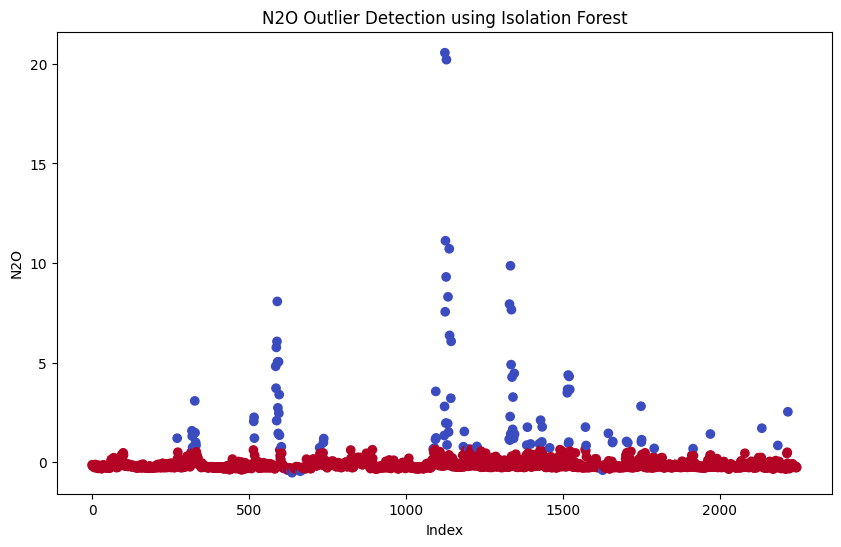

In [14]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = iso_pred

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['N2O'], c=data['Outlier'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Outlier Detection using Isolation Forest')
plt.show()

# Filter data to remove outliers
filtered_data = data[data['Outlier'] == 1]


# Display filtered data
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered Data without Outliers", dataframe=filtered_data)

In [15]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-1.518617,0.556855,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-1.560776,0.563758,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-1.276207,0.618974,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-1.708330,0.625877,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.547142,0.805331,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.168496,-0.195475,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.713393,0.011589,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.713393,0.011589,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.713393,0.011589,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1


KeyError: 'Outlier'

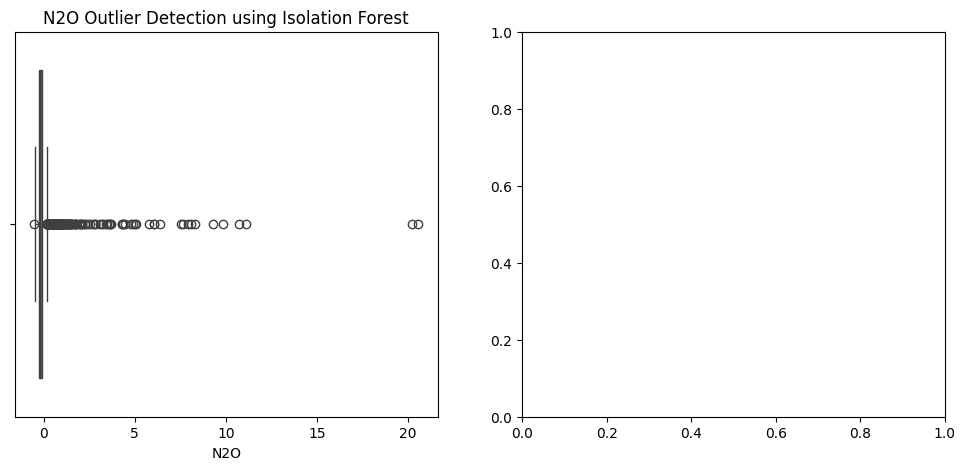

In [11]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(data.index, data['N2O'], c=data['Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
plt.show()

# Filter data to remove outliers
filtered_data = data[data['Outlier'] == 1]

# Save the filtered data to a new CSV file
filtered_data.to_csv('01.Dataset-Rofiqul/003.after_outlier_filtered_agriculture_dataset.csv', index=False)
print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")

# Display filtered data
print(filtered_data)


## Detect Outlier With Z-Score and IQR

In [16]:
# Extract the N2O column
N2O_data = data['N2O']

# Detect outliers using IQR method
Q1 = N2O_data.quantile(0.25)
Q3 = N2O_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound_IQR = Q1 - 1.5 * IQR
upper_bound_IQR = Q3 + 1.5 * IQR
outliers_IQR = N2O_data[(N2O_data < lower_bound_IQR) | (N2O_data > upper_bound_IQR)]

# Detect outliers using Z-score method
mean = N2O_data.mean()
std = N2O_data.std()
threshold = 3
lower_bound_Z = mean - threshold * std
upper_bound_Z = mean + threshold * std
outliers_Z = N2O_data[(N2O_data < lower_bound_Z) | (N2O_data > upper_bound_Z)]

# Create a summary table
summary_table = pd.DataFrame({
    'Method': ['IQR', 'Z-Score'],
    'Lower Bound': [lower_bound_IQR, lower_bound_Z],
    'Upper Bound': [upper_bound_IQR, upper_bound_Z],
    'Outlier Count': [outliers_IQR.count(), outliers_Z.count()]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/04.after_outlier_N2O_outlier_summary_IQR_ZScore.csv'
summary_table.to_csv(summary_file_path, index=False)

In [17]:
# Function to calculate IQR bounds
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to calculate Z-score bounds
def z_score_bounds(series, threshold=3):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return lower_bound, upper_bound

In [18]:
# Detect outliers and create summary table
summary_table = []
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])
    lower_bound_Z, upper_bound_Z = z_score_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]
    outliers_Z = data[(data[col] < lower_bound_Z) | (data[col] > upper_bound_Z)][col]

    summary_table.append({
        'Column': col,
        'Method': 'IQR',
        'Lower Bound': lower_bound_IQR,
        'Upper Bound': upper_bound_IQR,
        'Outlier Count': outliers_IQR.count()
    })

    summary_table.append({
        'Column': col,
        'Method': 'Z-Score',
        'Lower Bound': lower_bound_Z,
        'Upper Bound': upper_bound_Z,
        'Outlier Count': outliers_Z.count()
    })

summary_df = pd.DataFrame(summary_table)

In [19]:
# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/004.after_outlier_numerical_columns_outlier_summary.csv'
summary_df.to_csv(summary_file_path, index=False)
summary_df

,Column,Method,Lower Bound,Upper Bound,Outlier Count
0,Year,IQR,-1.500078,1.817944,259
1,Year,Z-Score,-3.000668,3.000668,0
2,N2O,IQR,-0.491163,0.166560,251
3,N2O,Z-Score,-3.000668,3.000668,32
4,N_rate,IQR,-1.077984,1.416763,283
5,N_rate,Z-Score,-3.000668,3.000668,0
6,PP2,IQR,-1.413238,0.972001,244
7,PP2,Z-Score,-3.000668,3.000668,47
8,PP7,IQR,-2.143730,1.809364,114
9,PP7,Z-Score,-3.000668,3.000668,38


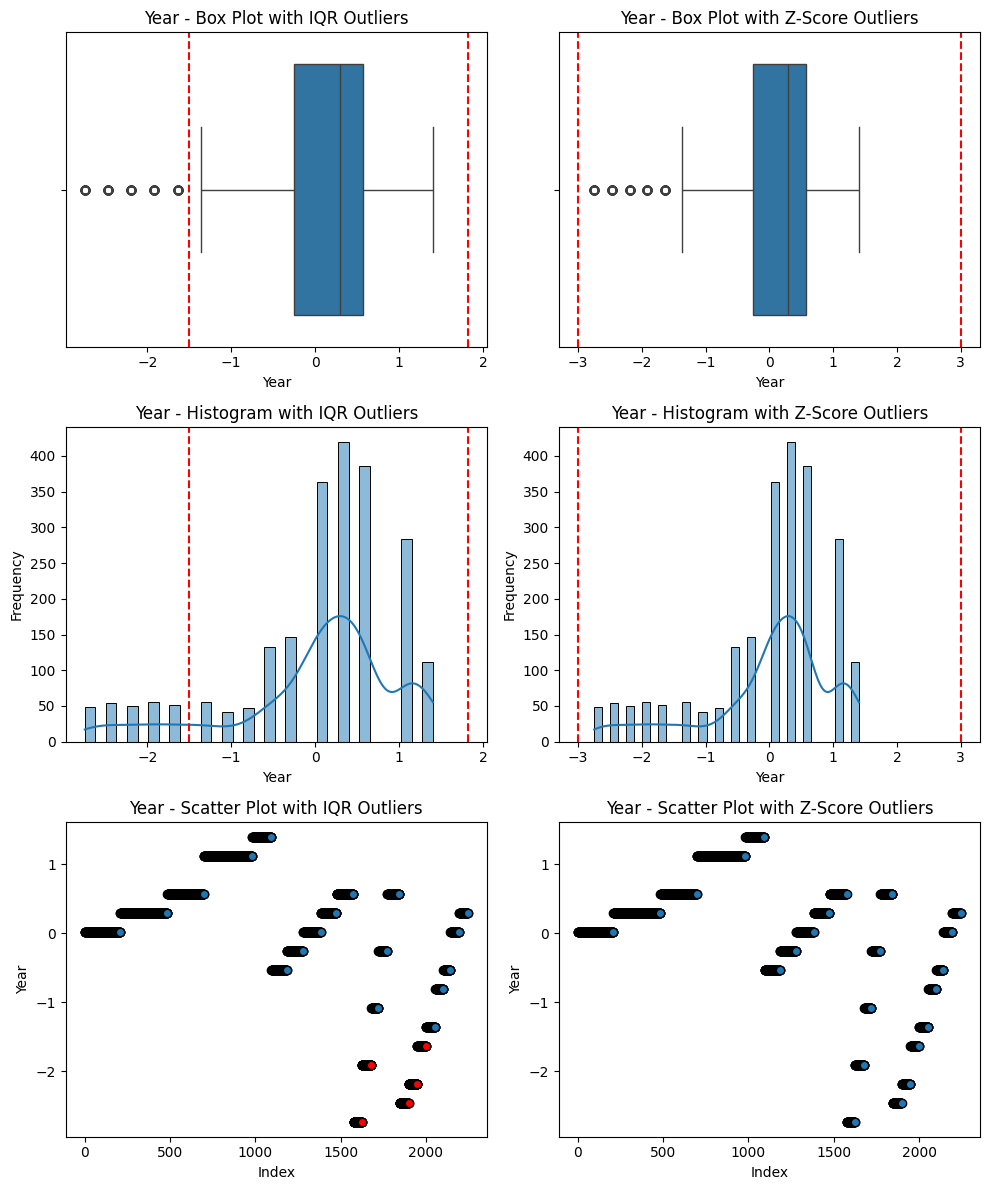

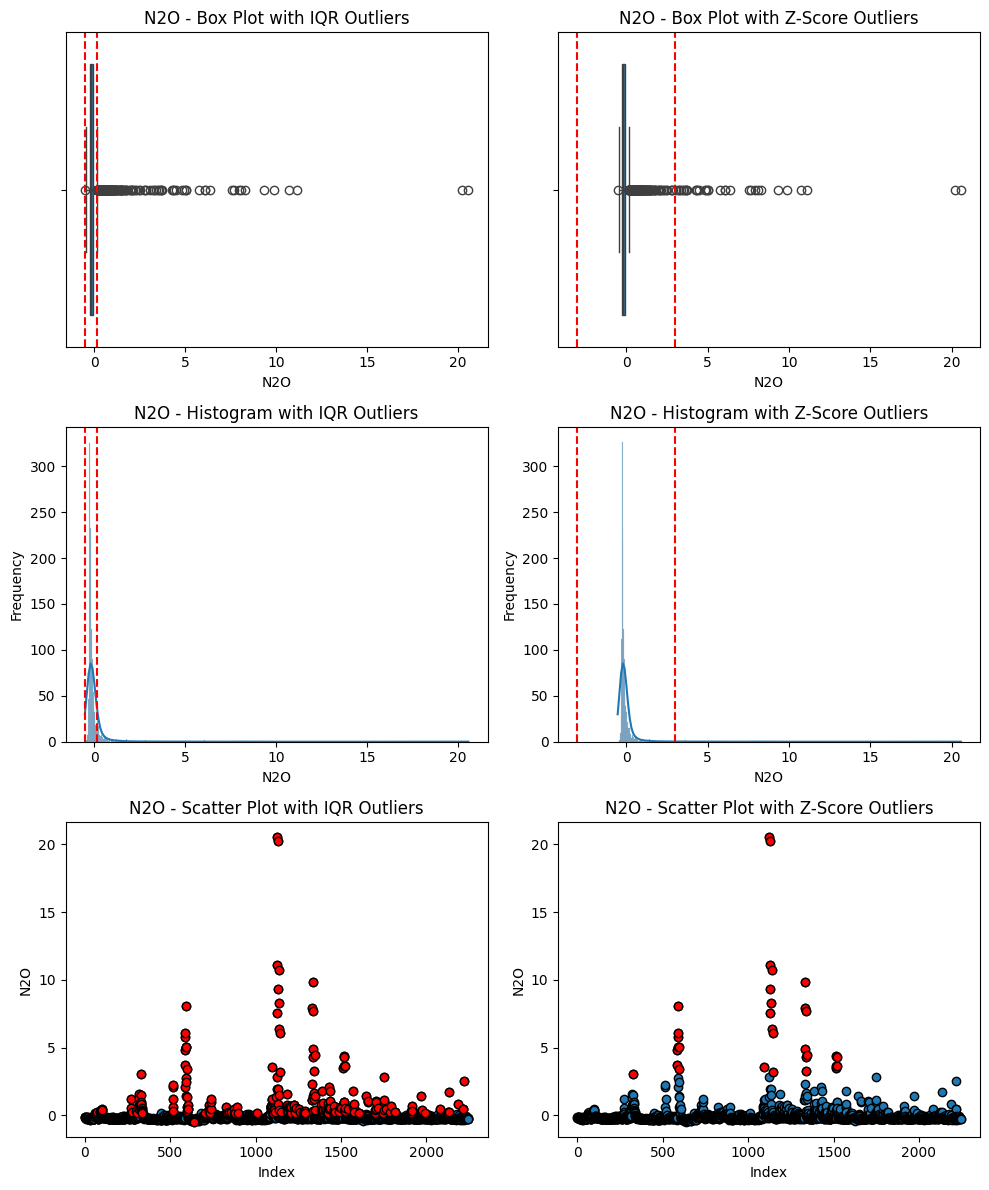

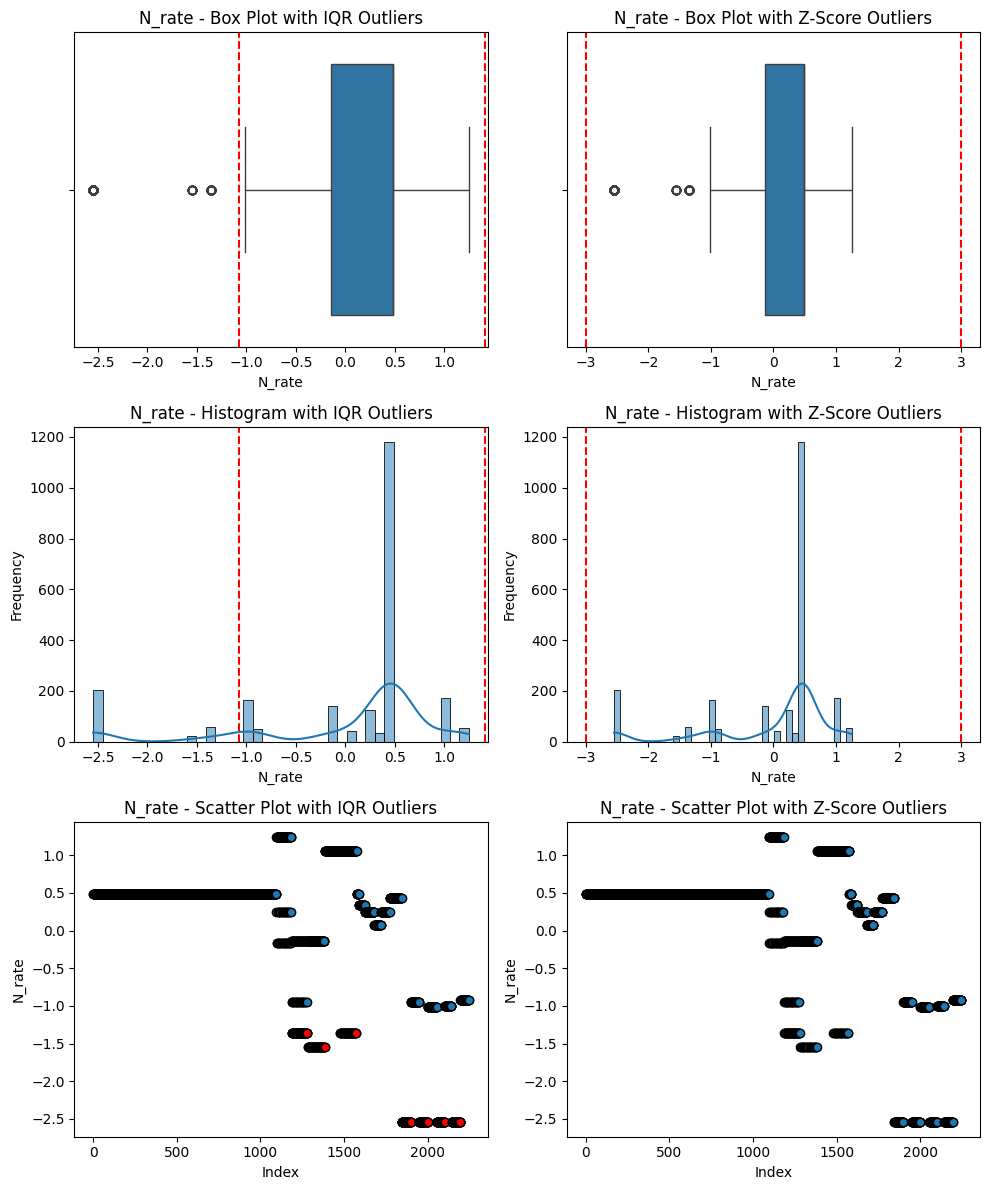

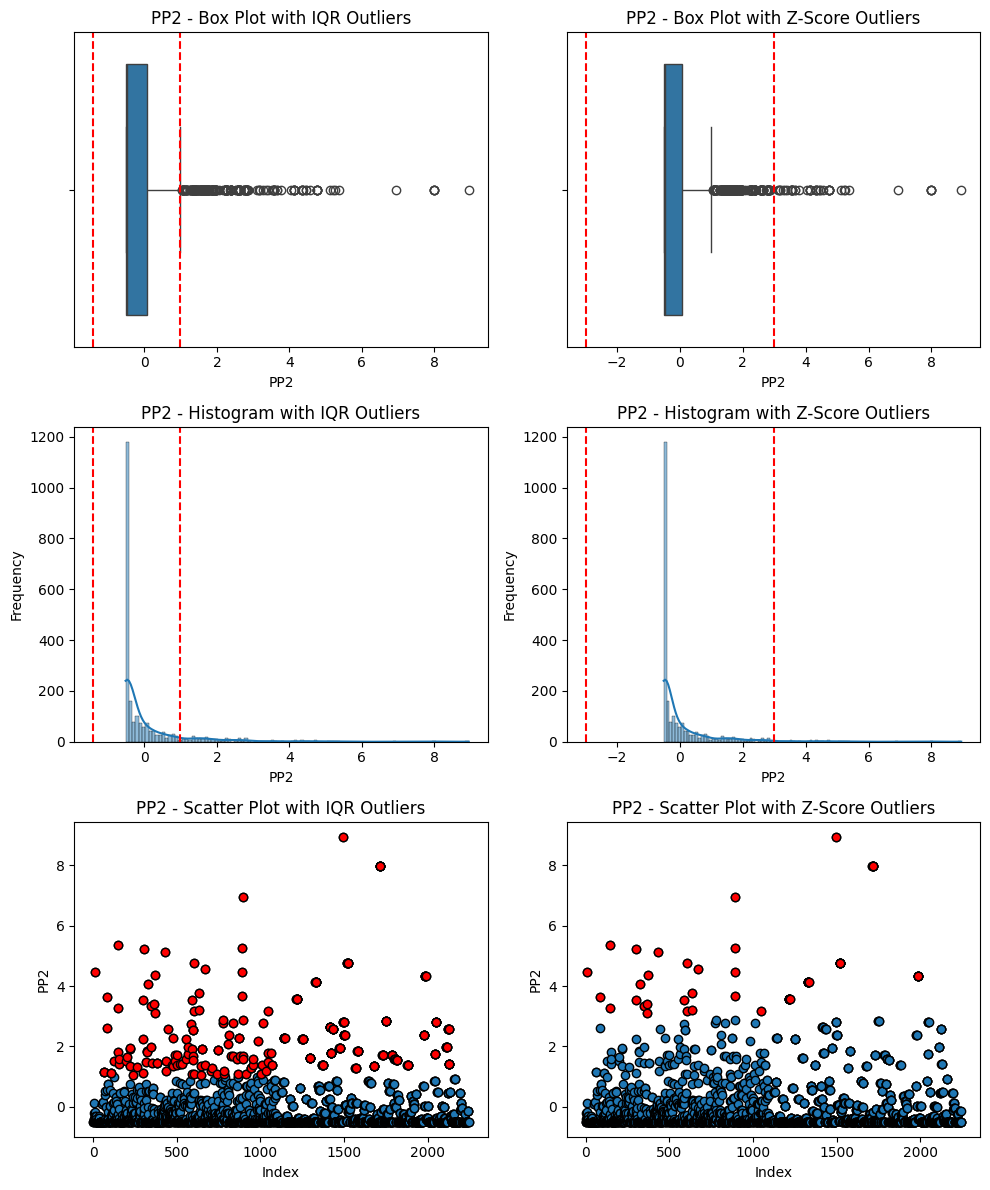

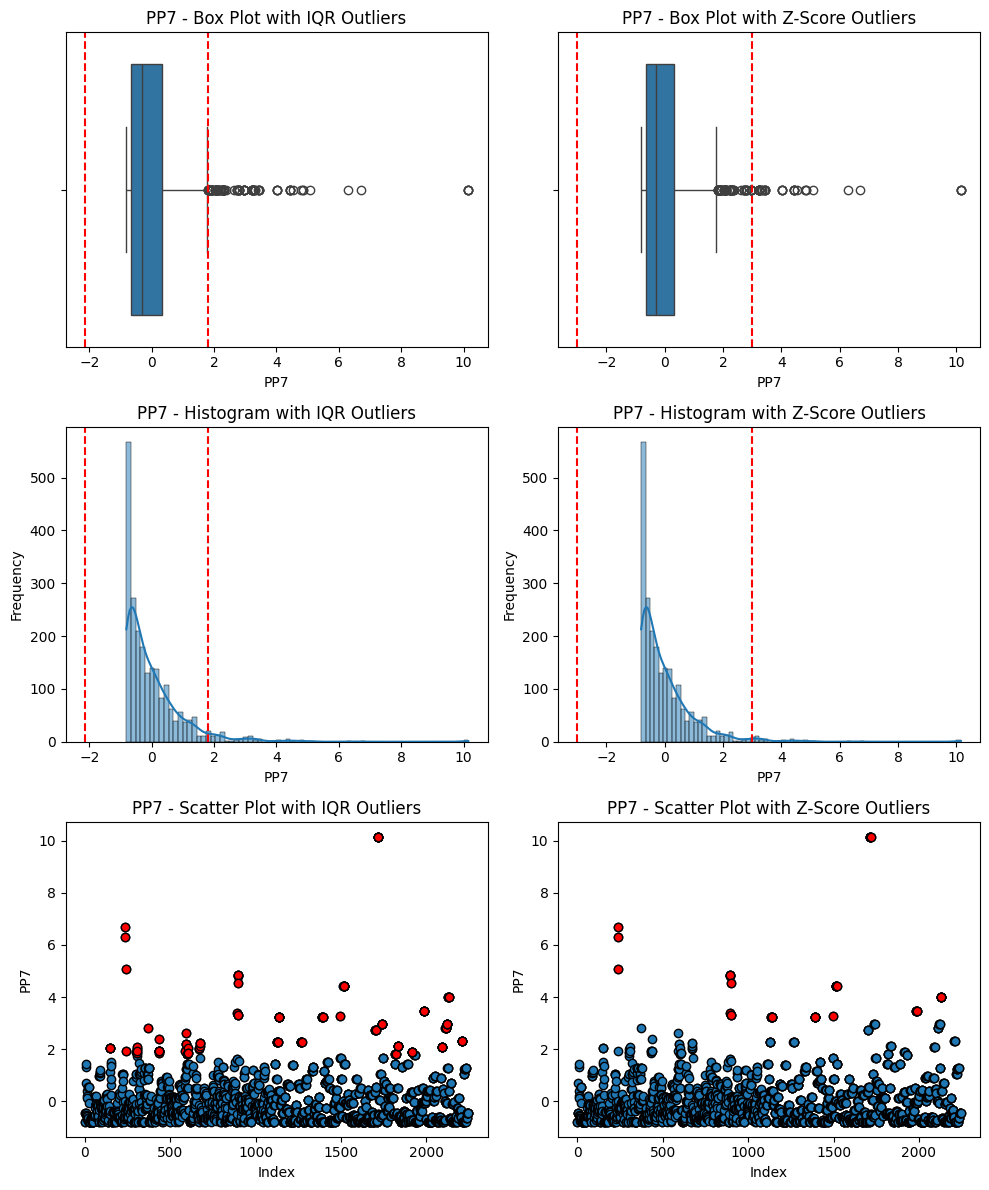

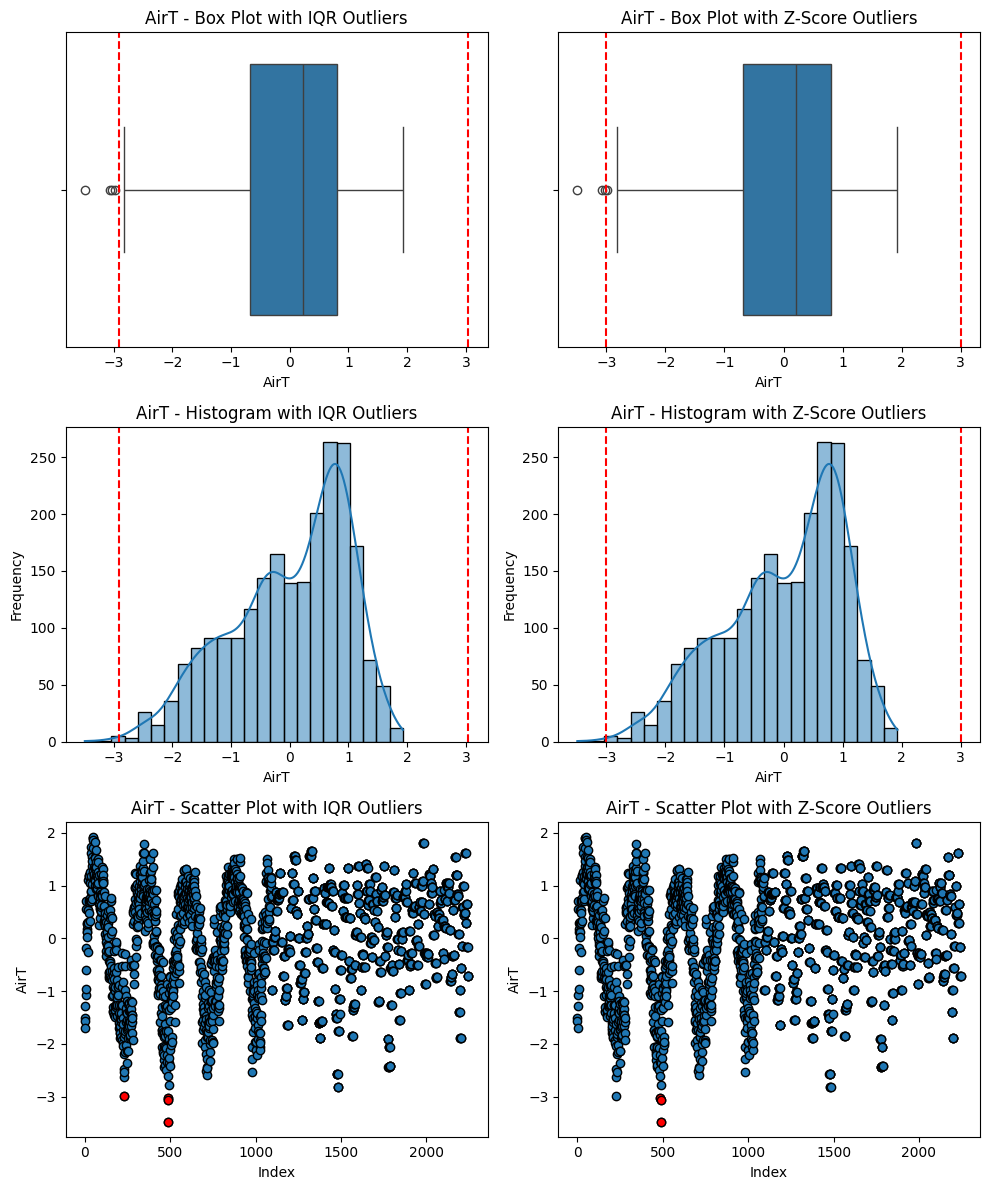

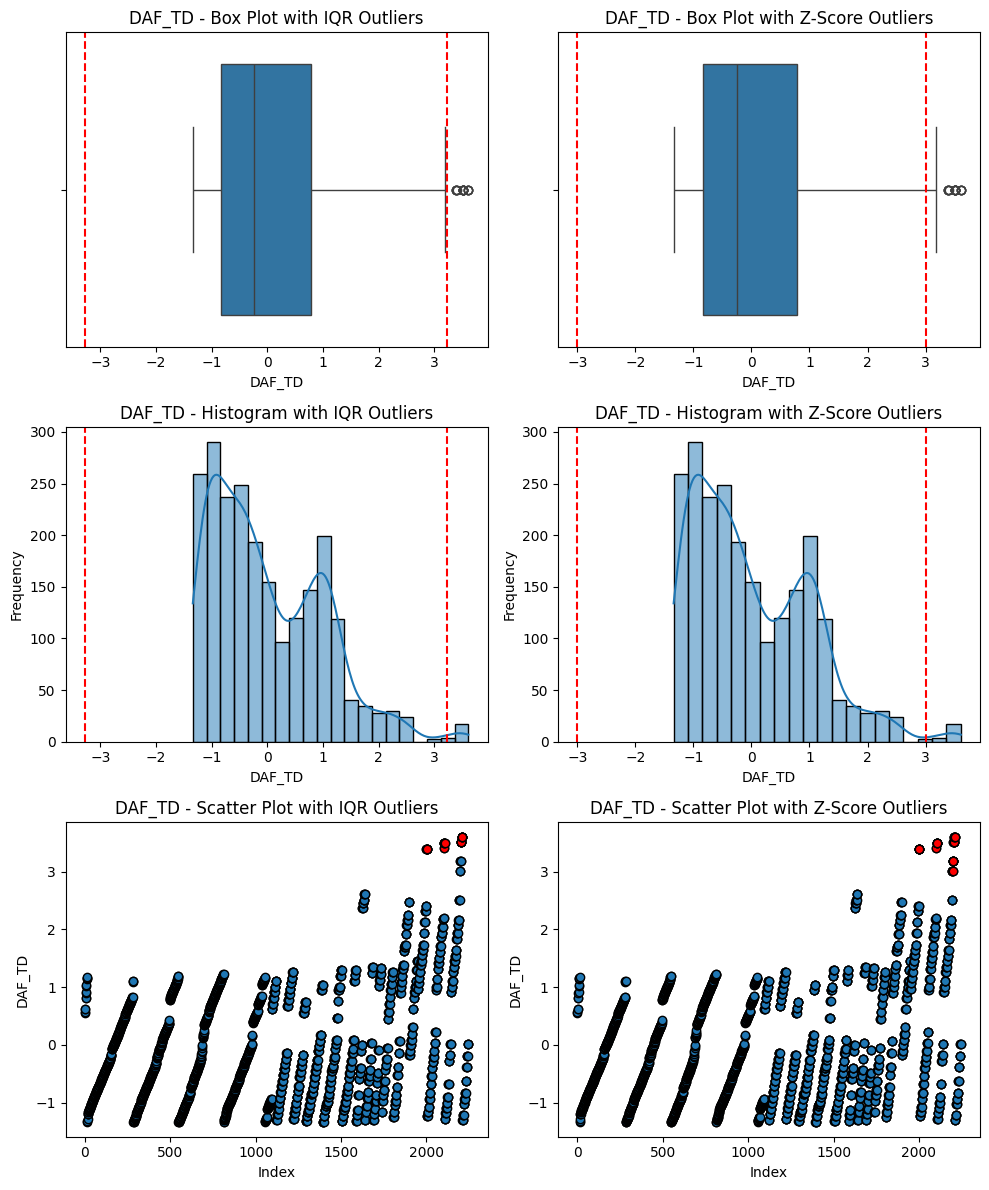

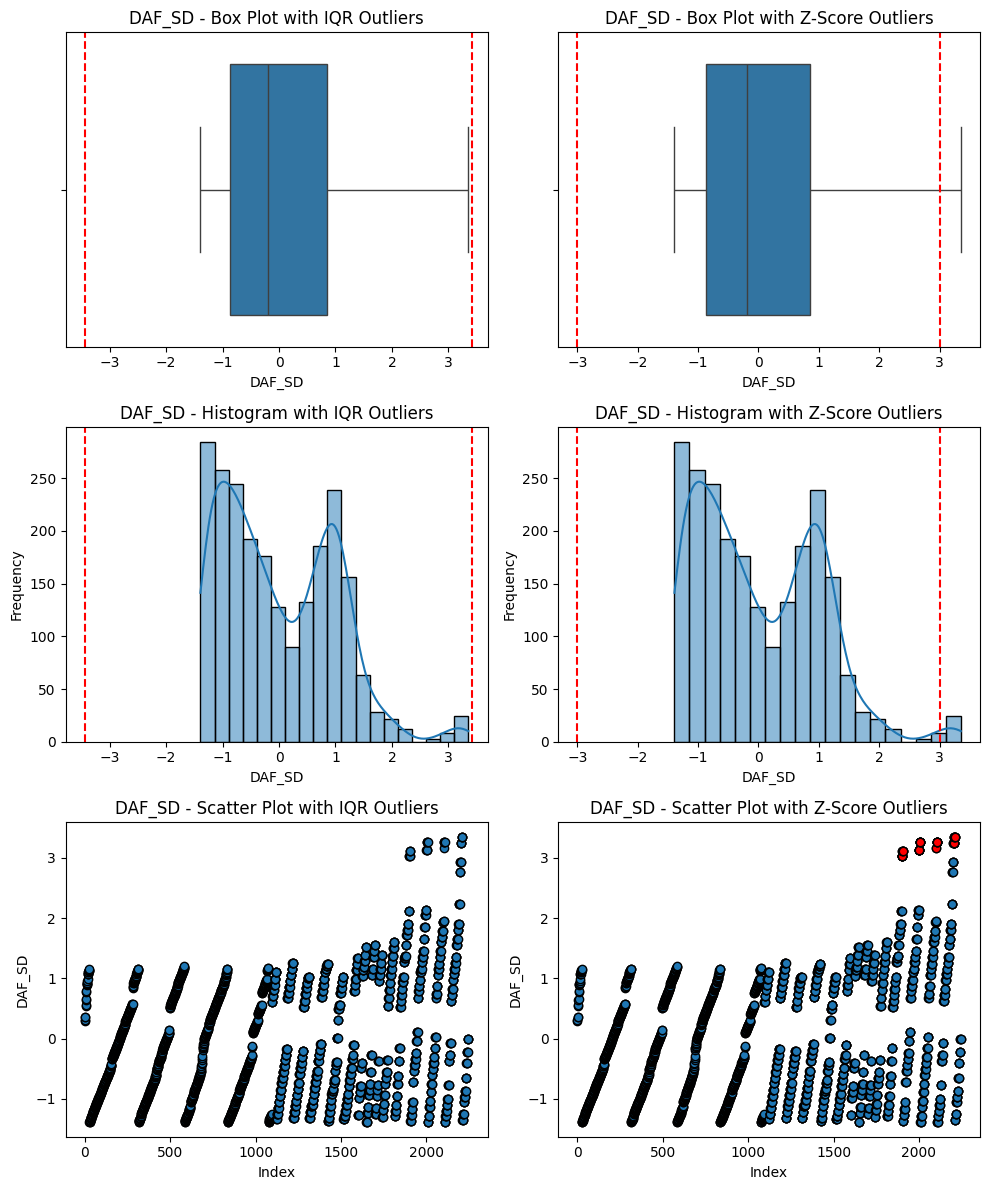

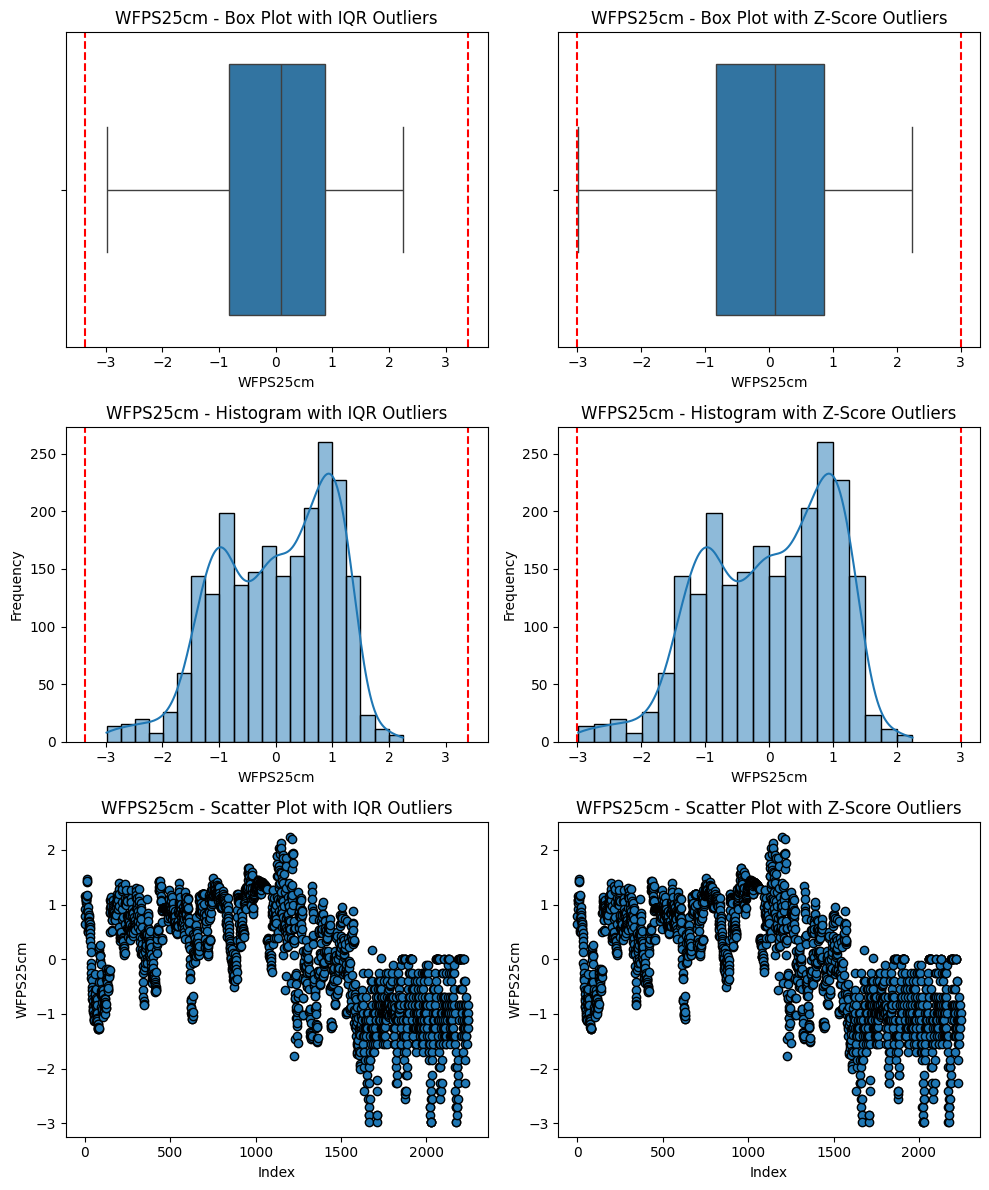

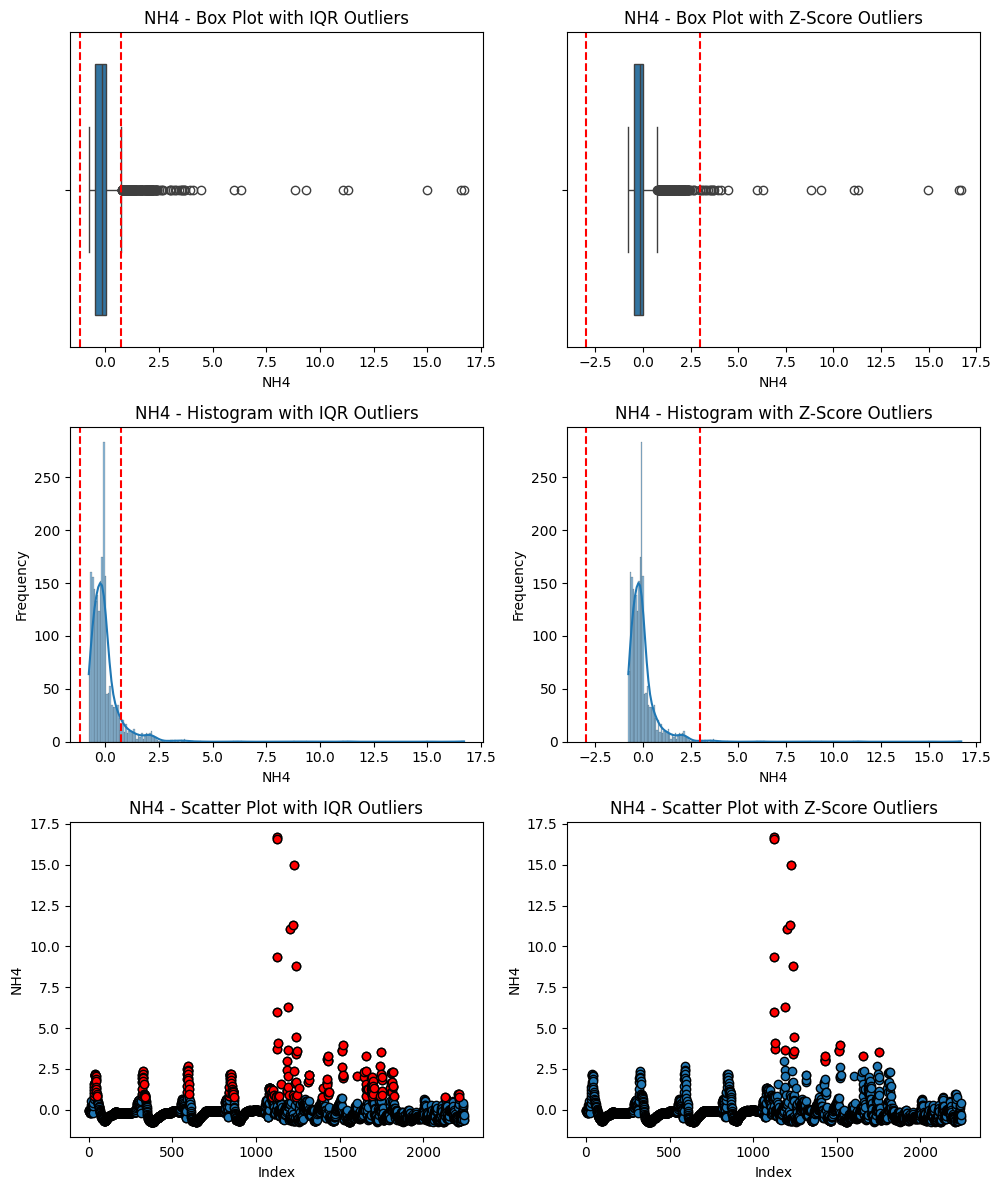

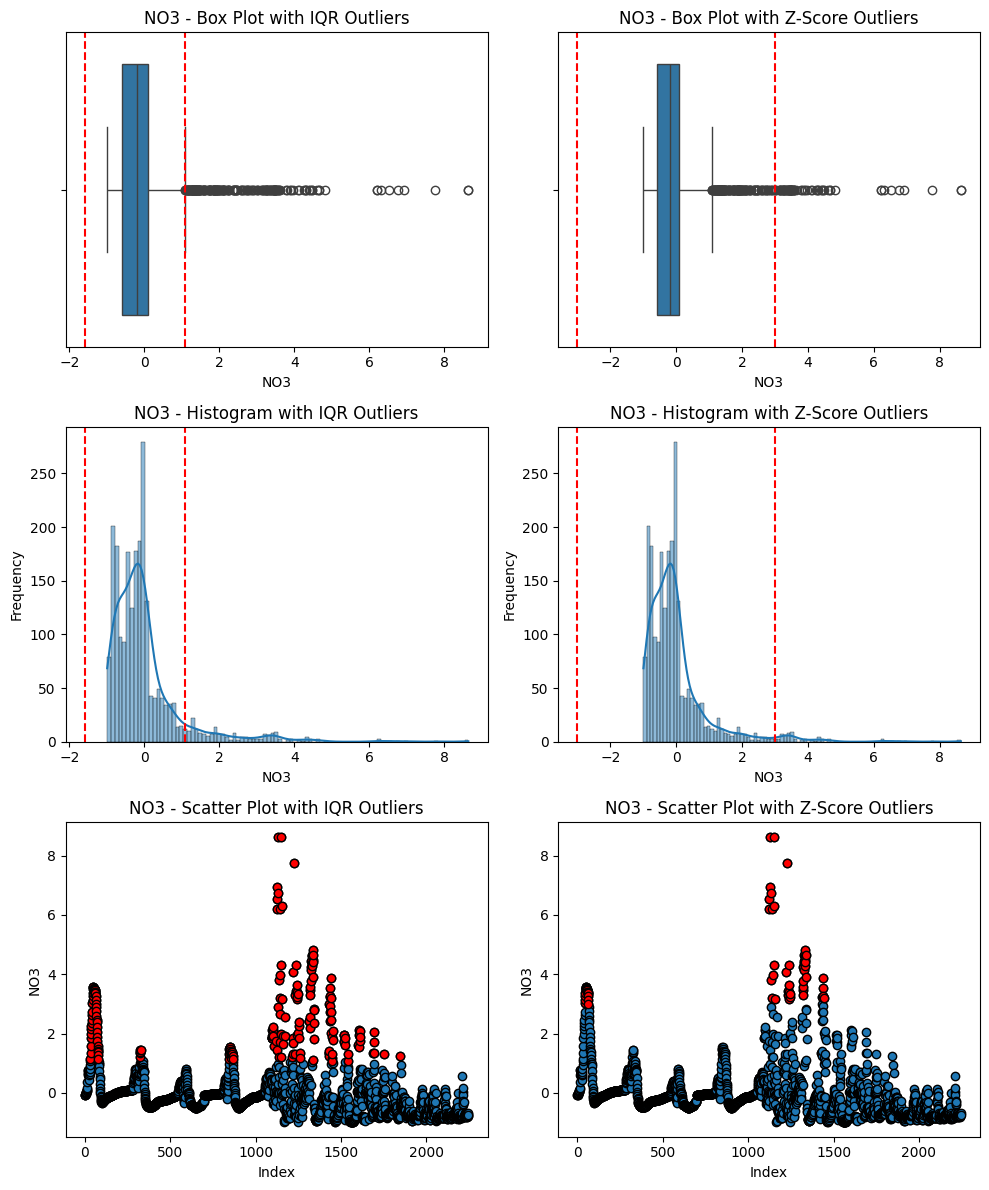

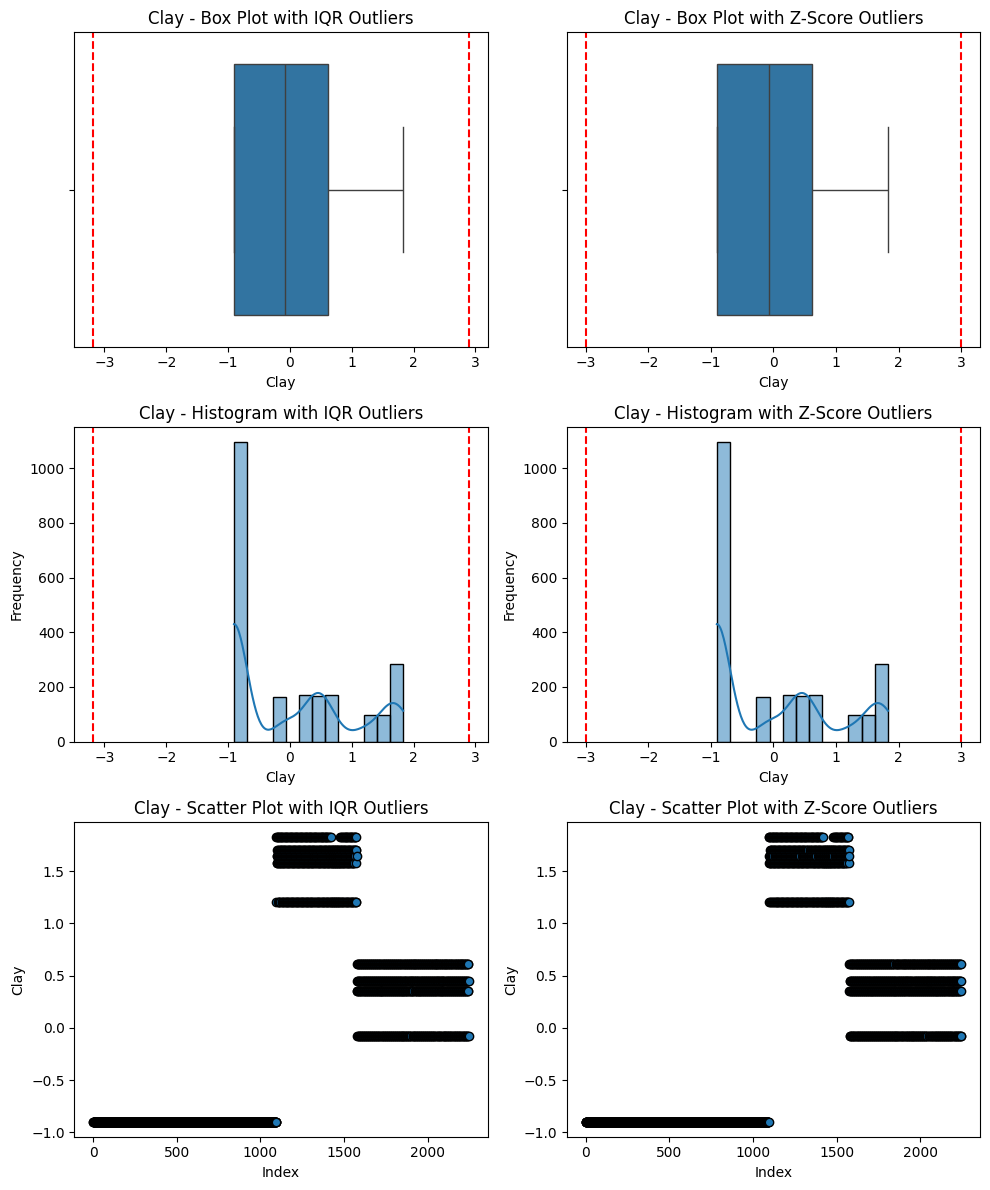

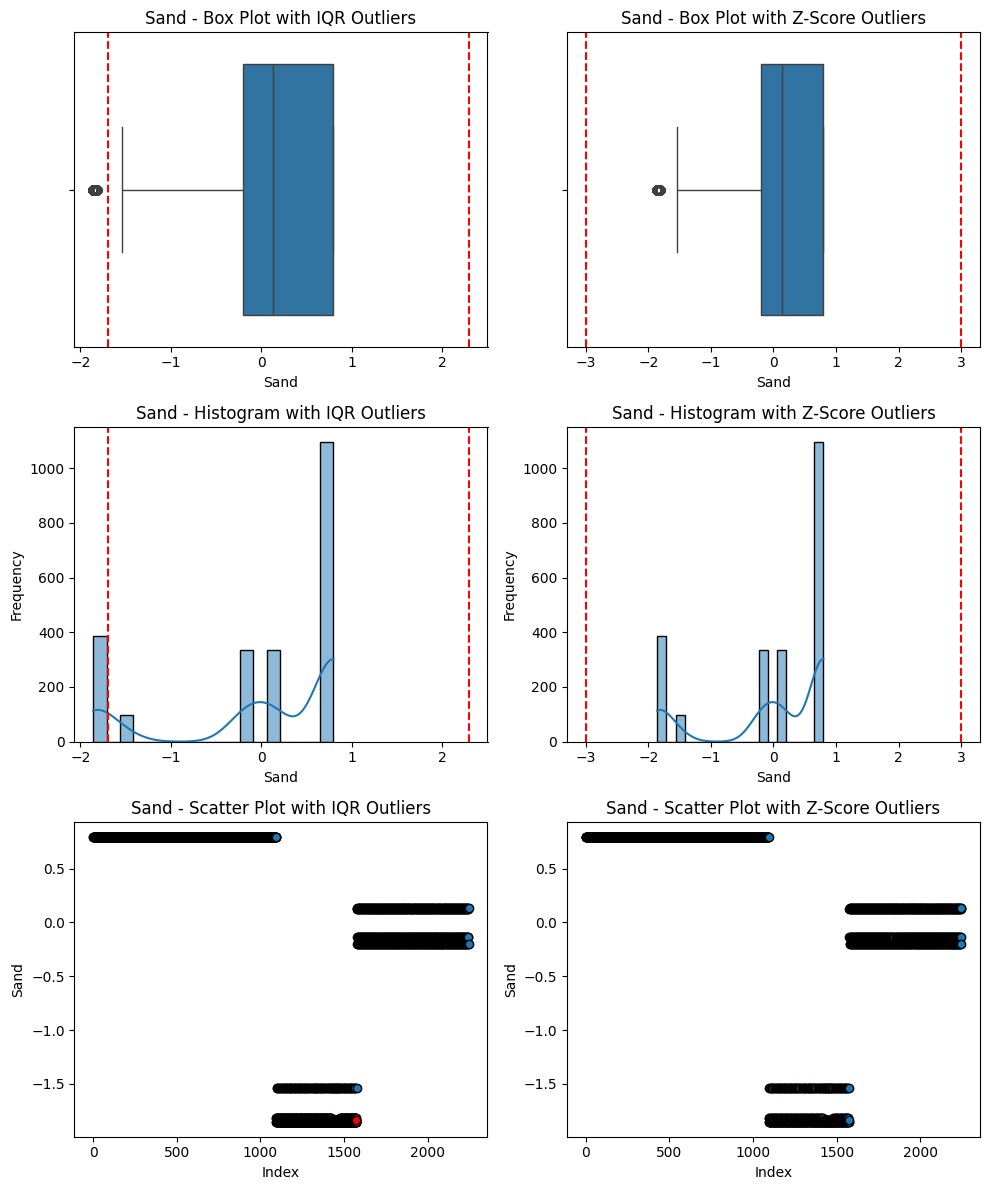

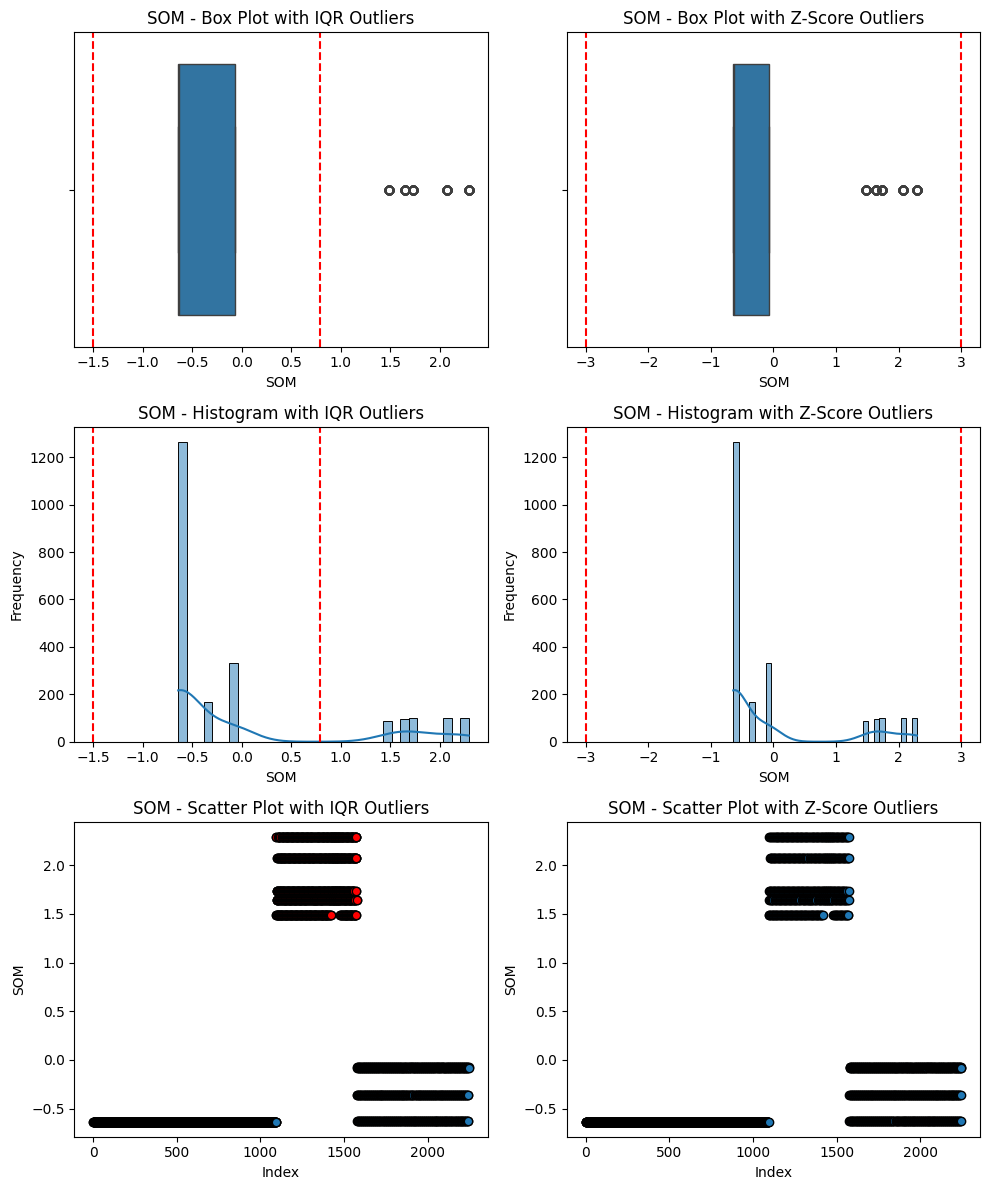

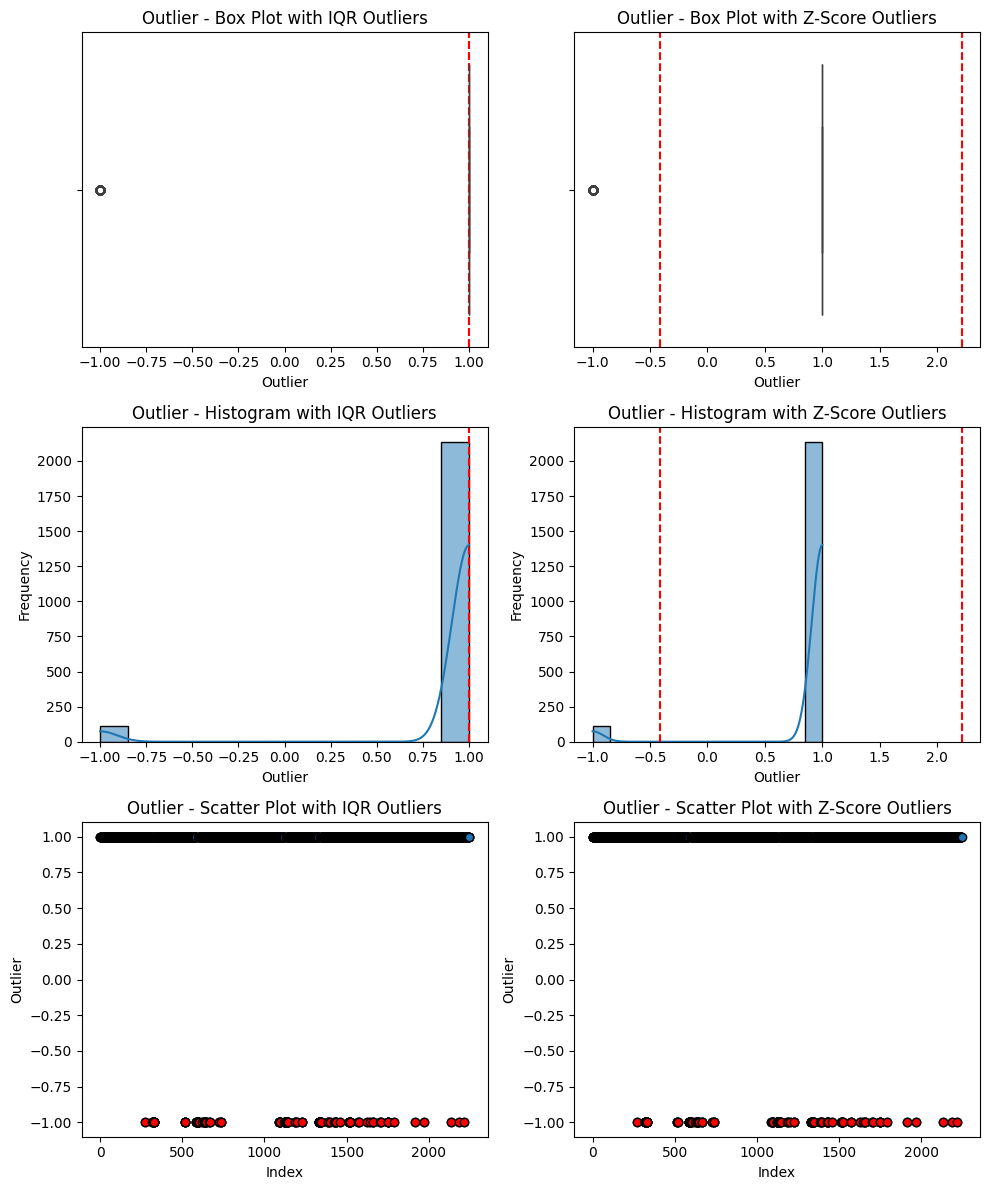

In [20]:
# Visualize the outliers using box plots, histograms, and scatter plots
for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])
    lower_bound_Z, upper_bound_Z = z_score_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]
    outliers_Z = data[(data[col] < lower_bound_Z) | (data[col] > upper_bound_Z)][col]

    fig, axs = plt.subplots(3, 2, figsize=(10, 12))

    # Box Plot - IQR Outliers
    sns.boxplot(x=data[col], ax=axs[0, 0])
    axs[0, 0].set_title(f'{col} - Box Plot with IQR Outliers')
    axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[0, 0].set_xlabel(col)

    # Box Plot - Z-Score Outliers
    sns.boxplot(x=data[col], ax=axs[0, 1])
    axs[0, 1].set_title(f'{col} - Box Plot with Z-Score Outliers')
    axs[0, 1].axvline(lower_bound_Z, color='r', linestyle='--')
    axs[0, 1].axvline(upper_bound_Z, color='r', linestyle='--')
    axs[0, 1].set_xlabel(col)

    # Histogram - IQR Outliers
    sns.histplot(data[col], kde=True, ax=axs[1, 0])
    axs[1, 0].set_title(f'{col} - Histogram with IQR Outliers')
    axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[1, 0].set_xlabel(col)
    axs[1, 0].set_ylabel('Frequency')

    # Histogram - Z-Score Outliers
    sns.histplot(data[col], kde=True, ax=axs[1, 1])
    axs[1, 1].set_title(f'{col} - Histogram with Z-Score Outliers')
    axs[1, 1].axvline(lower_bound_Z, color='r', linestyle='--')
    axs[1, 1].axvline(upper_bound_Z, color='r', linestyle='--')
    axs[1, 1].set_xlabel(col)
    axs[1, 1].set_ylabel('Frequency')

    # Scatter Plot - IQR Outliers
    axs[2, 0].scatter(data.index, data[col], edgecolor='k')
    axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
    axs[2, 0].set_title(f'{col} - Scatter Plot with IQR Outliers')
    axs[2, 0].set_xlabel('Index')
    axs[2, 0].set_ylabel(col)

    # Scatter Plot - Z-Score Outliers
    axs[2, 1].scatter(data.index, data[col], edgecolor='k')
    axs[2, 1].scatter(outliers_Z.index, outliers_Z, color='r', edgecolor='k')
    axs[2, 1].set_title(f'{col} - Scatter Plot with Z-Score Outliers')
    axs[2, 1].set_xlabel('Index')
    axs[2, 1].set_ylabel(col)

    # Adjust layout
    plt.tight_layout()
    plt.show()

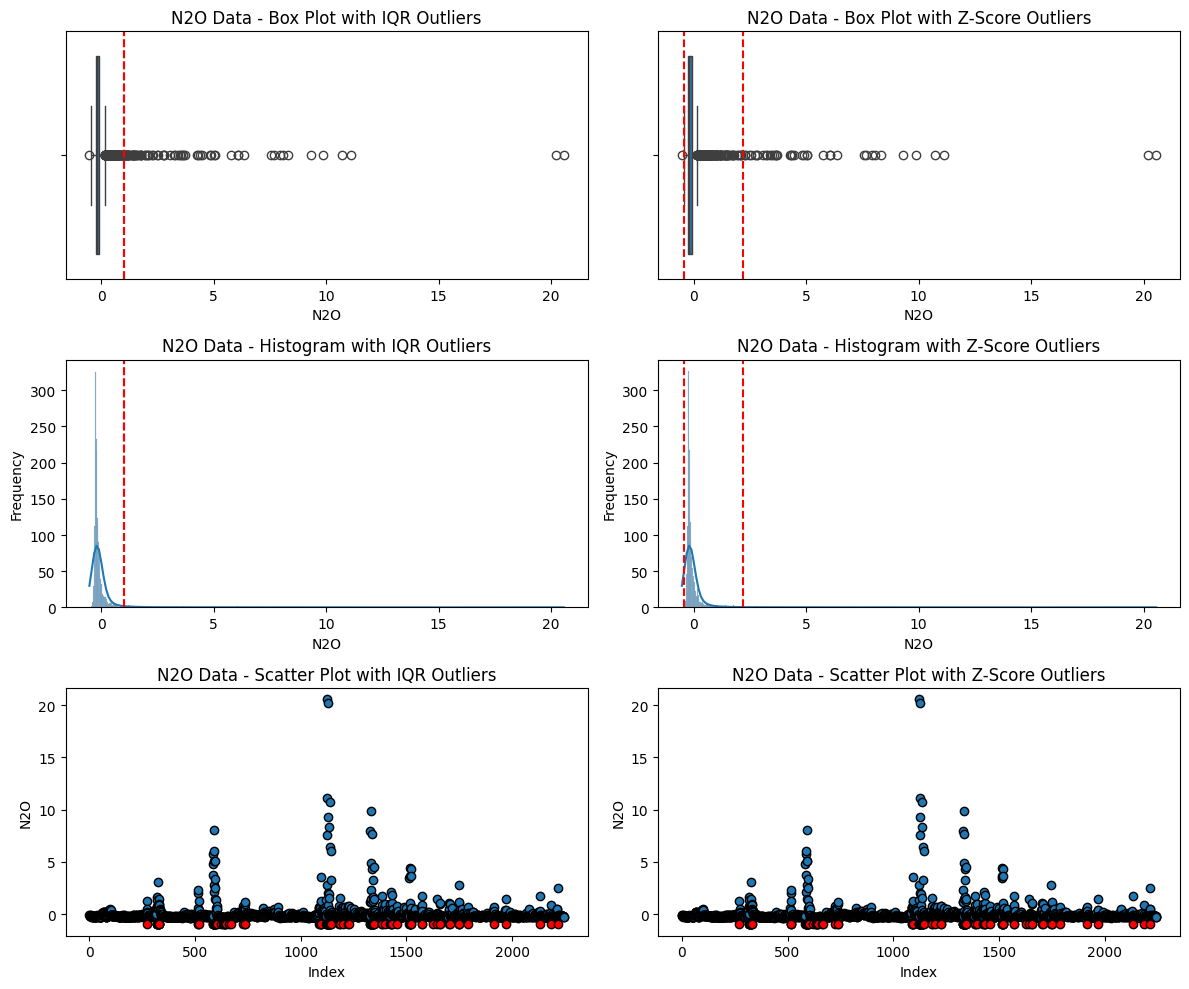

In [21]:


# Display the summary table
# import ace_tools as tools; tools.display_dataframe_to_user(name="N2O Outlier Summary", dataframe=summary_table)

# Visualize the outliers using box plots and scatter plots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Box Plot - N2O Data with IQR Outliers
sns.boxplot(x=N2O_data, ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IQR Outliers')
axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with Z-Score Outliers
sns.boxplot(x=N2O_data, ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with Z-Score Outliers')
axs[0, 1].axvline(lower_bound_Z, color='r', linestyle='--')
axs[0, 1].axvline(upper_bound_Z, color='r', linestyle='--')
axs[0, 1].set_xlabel('N2O')

# Histogram - N2O Data with IQR Outliers
sns.histplot(N2O_data, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IQR Outliers')
axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with Z-Score Outliers
sns.histplot(N2O_data, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with Z-Score Outliers')
axs[1, 1].axvline(lower_bound_Z, color='r', linestyle='--')
axs[1, 1].axvline(upper_bound_Z, color='r', linestyle='--')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IQR Outliers
axs[2, 0].scatter(N2O_data.index, N2O_data, edgecolor='k')
axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IQR Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - N2O Data with Z-Score Outliers
axs[2, 1].scatter(N2O_data.index, N2O_data, edgecolor='k')
axs[2, 1].scatter(outliers_Z.index, outliers_Z, color='r', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with Z-Score Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

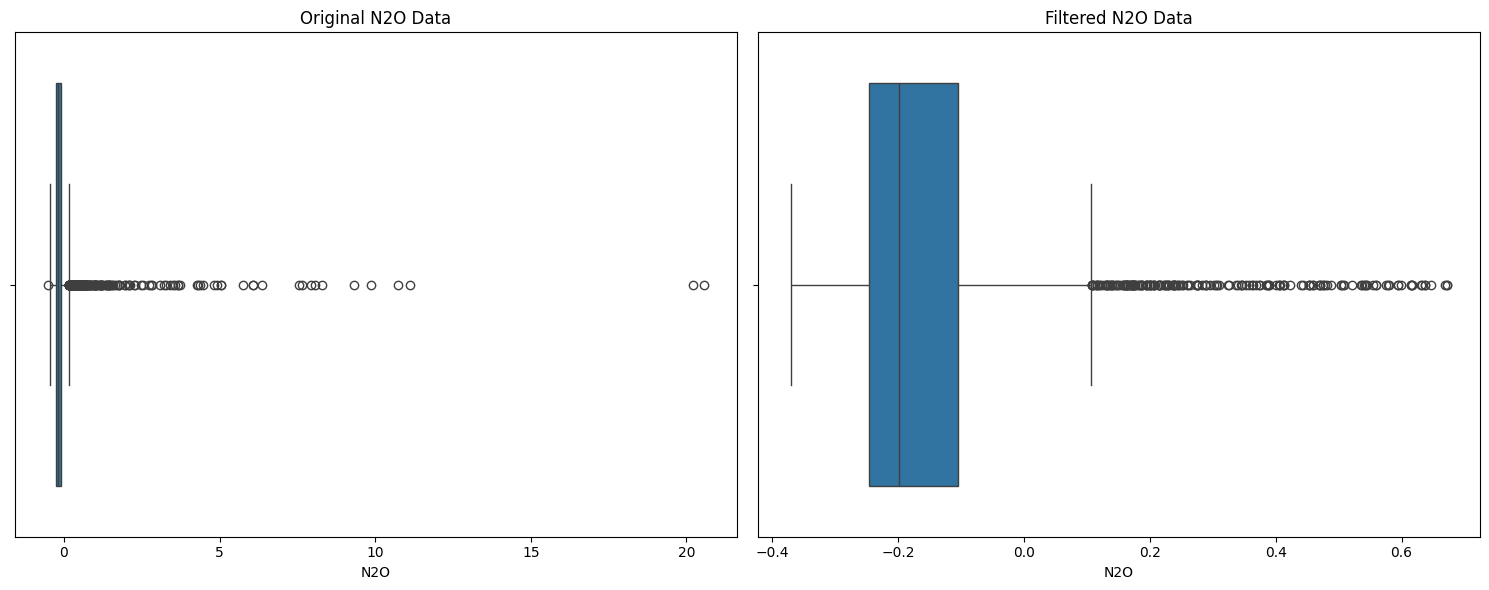

In [ ]:
# Box Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['N2O'])
plt.title('Original N2O Data')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data['N2O'])
plt.title('Filtered N2O Data')

plt.tight_layout()
plt.show()



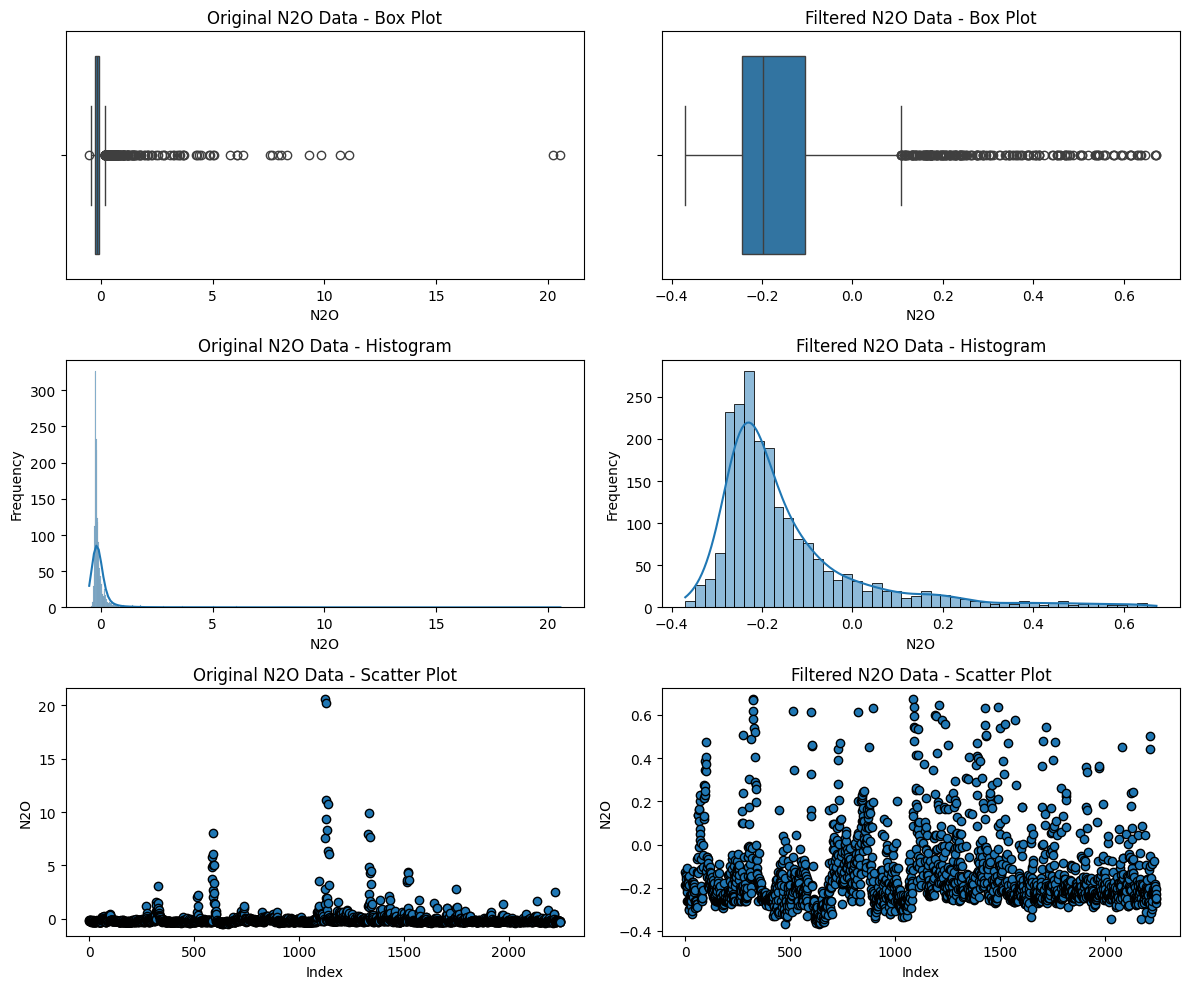

In [ ]:
# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(12, 10))



# Box Plot - Original N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Original N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Filtered N2O Data
sns.boxplot(x=filtered_data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Filtered N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Original N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(filtered_data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Filtered N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Original N2O Data
axs[2, 0].scatter(data.index, data['N2O'], edgecolor='k')
axs[2, 0].set_title('Original N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 1].scatter(filtered_data.index, filtered_data['N2O'], edgecolor='k')
axs[2, 1].set_title('Filtered N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

## Detect Outliers with DBSCAN

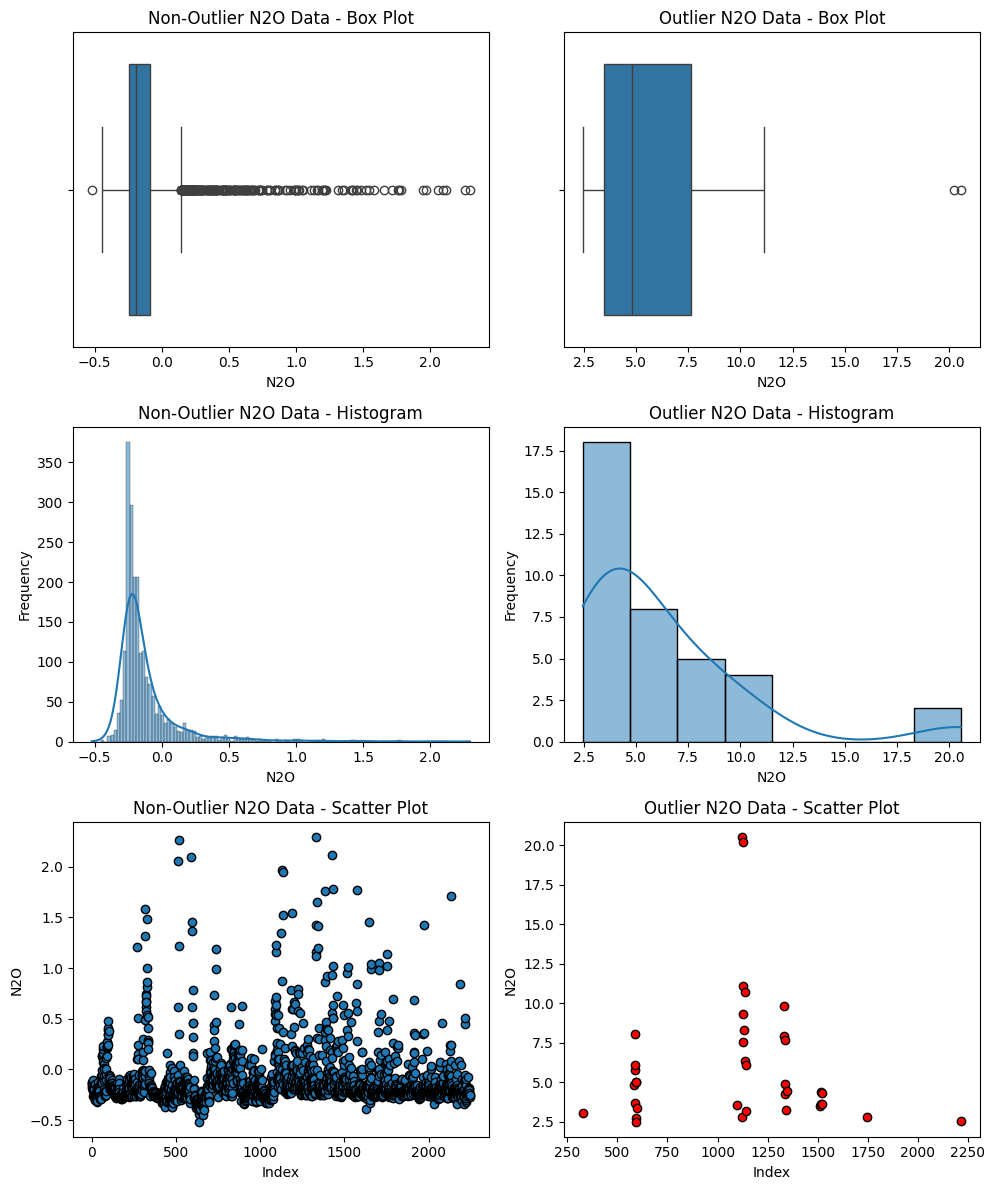

In [ ]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = dbscan_pred

# Separate outliers and non-outliers
outliers = data[data['Outlier'] == -1]
non_outliers = data[data['Outlier'] != -1]

# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Box Plot - Original N2O Data
sns.boxplot(x=non_outliers['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Non-Outlier N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outlier N2O Data
sns.boxplot(x=outliers['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outlier N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Non-Outlier N2O Data
sns.histplot(non_outliers['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Non-Outlier N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Outlier N2O Data
sns.histplot(outliers['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outlier N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Non-Outlier N2O Data
axs[2, 0].scatter(non_outliers.index, non_outliers['N2O'], edgecolor='k')
axs[2, 0].set_title('Non-Outlier N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Outlier N2O Data
axs[2, 1].scatter(outliers.index, outliers['N2O'], edgecolor='k', color='red')
axs[2, 1].set_title('Outlier N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

# Display filtered data without outliers
filtered_data = non_outliers.drop(columns=['Outlier'])


## Detect Outlier with OneClass SVM

          Method  Outlier Count
0  One-Class SVM            112


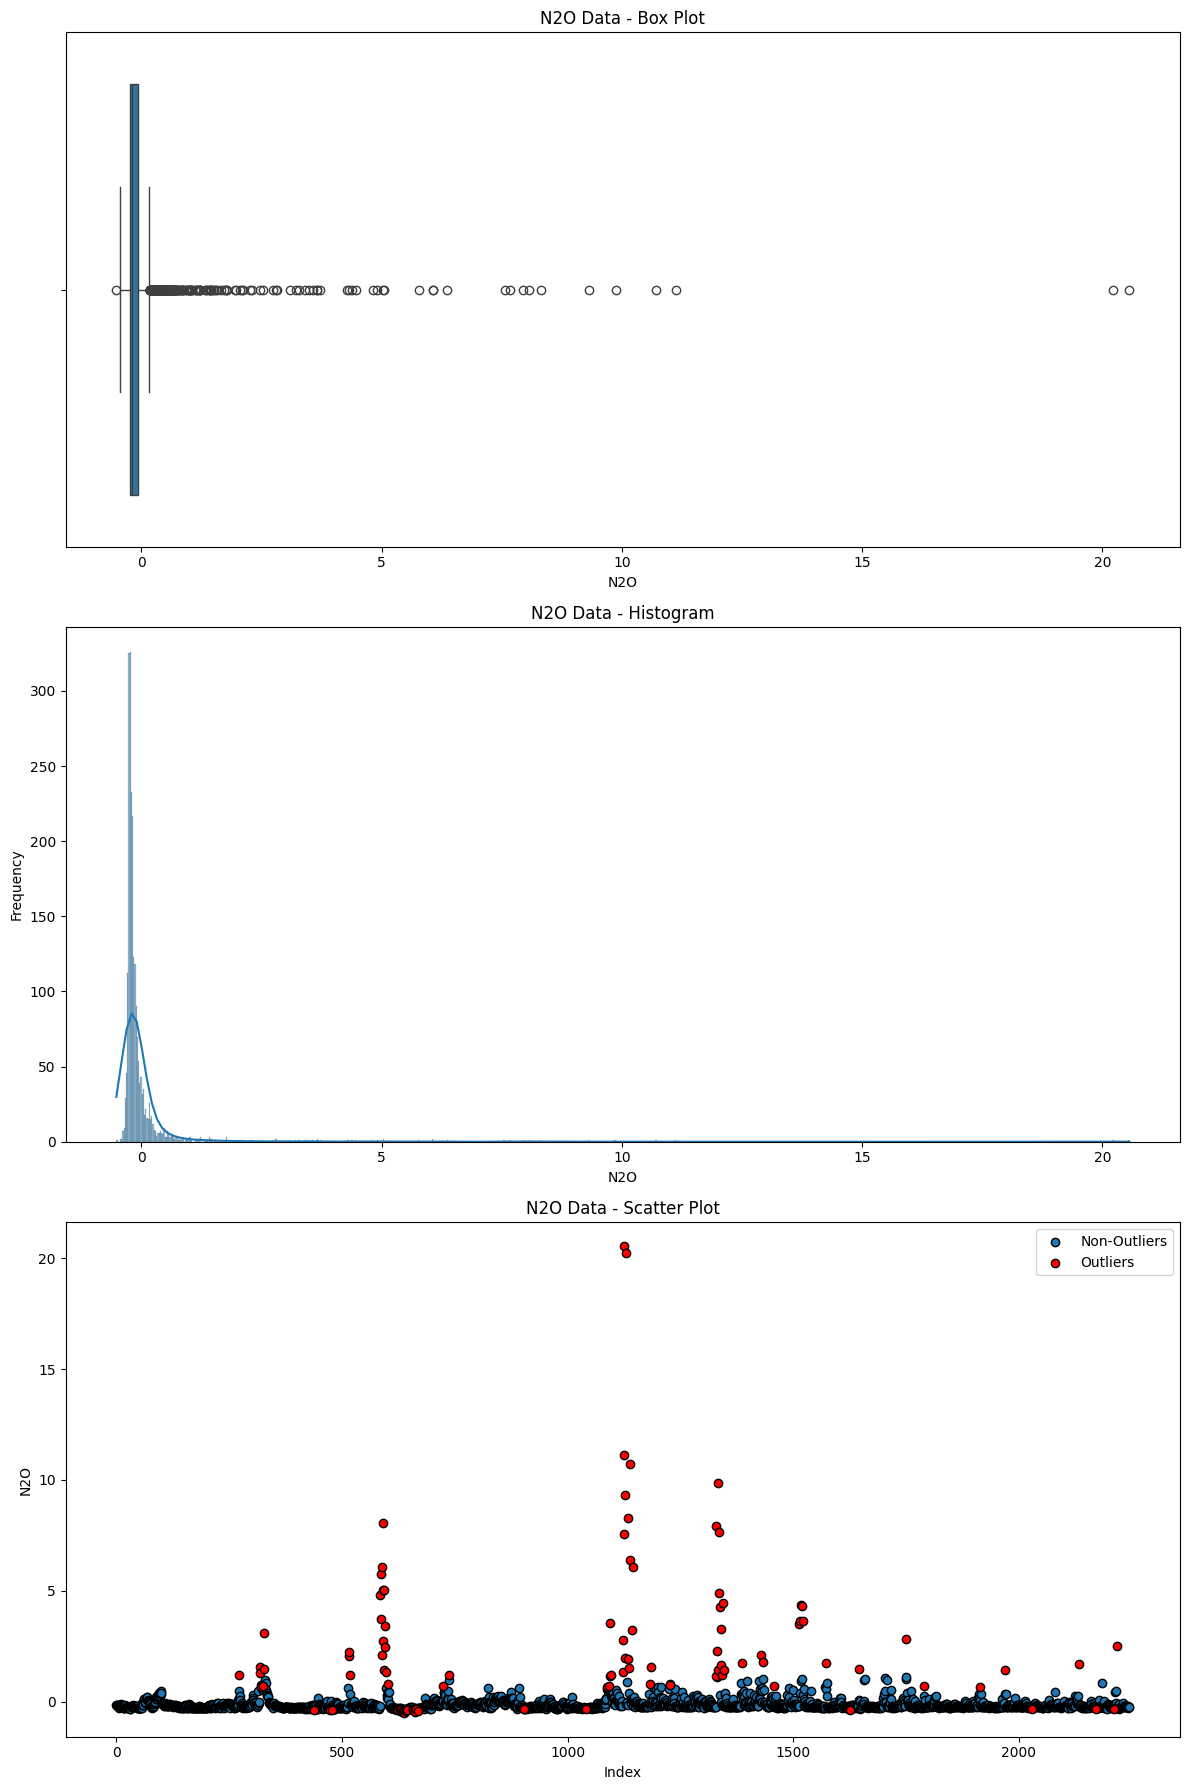

In [ ]:
N2O_data = data[['N2O']]
# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = ocsvm_pred

# Separate outliers and non-outliers
outliers = data[data['Outlier'] == -1]
non_outliers = data[data['Outlier'] != -1]

# Summary of results
outlier_count = outliers.shape[0]
summary_table = pd.DataFrame({
    'Method': ['One-Class SVM'],
    'Outlier Count': [outlier_count]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/04.n2o_outlier_summary_ocsvm.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Box Plot - N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Data - Box Plot')
axs[0].set_xlabel('N2O')

# Histogram - N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1])
axs[1].set_title('N2O Data - Histogram')
axs[1].set_xlabel('N2O')
axs[1].set_ylabel('Frequency')

# Scatter Plot - N2O Data
axs[2].scatter(non_outliers.index, non_outliers['N2O'], label='Non-Outliers', edgecolor='k')
axs[2].scatter(outliers.index, outliers['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2].set_title('N2O Data - Scatter Plot')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('N2O')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Detection Outlier Comparison

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


             Method  Outlier Count
0  Isolation Forest            113
1            DBSCAN             37
2     One-Class SVM            112


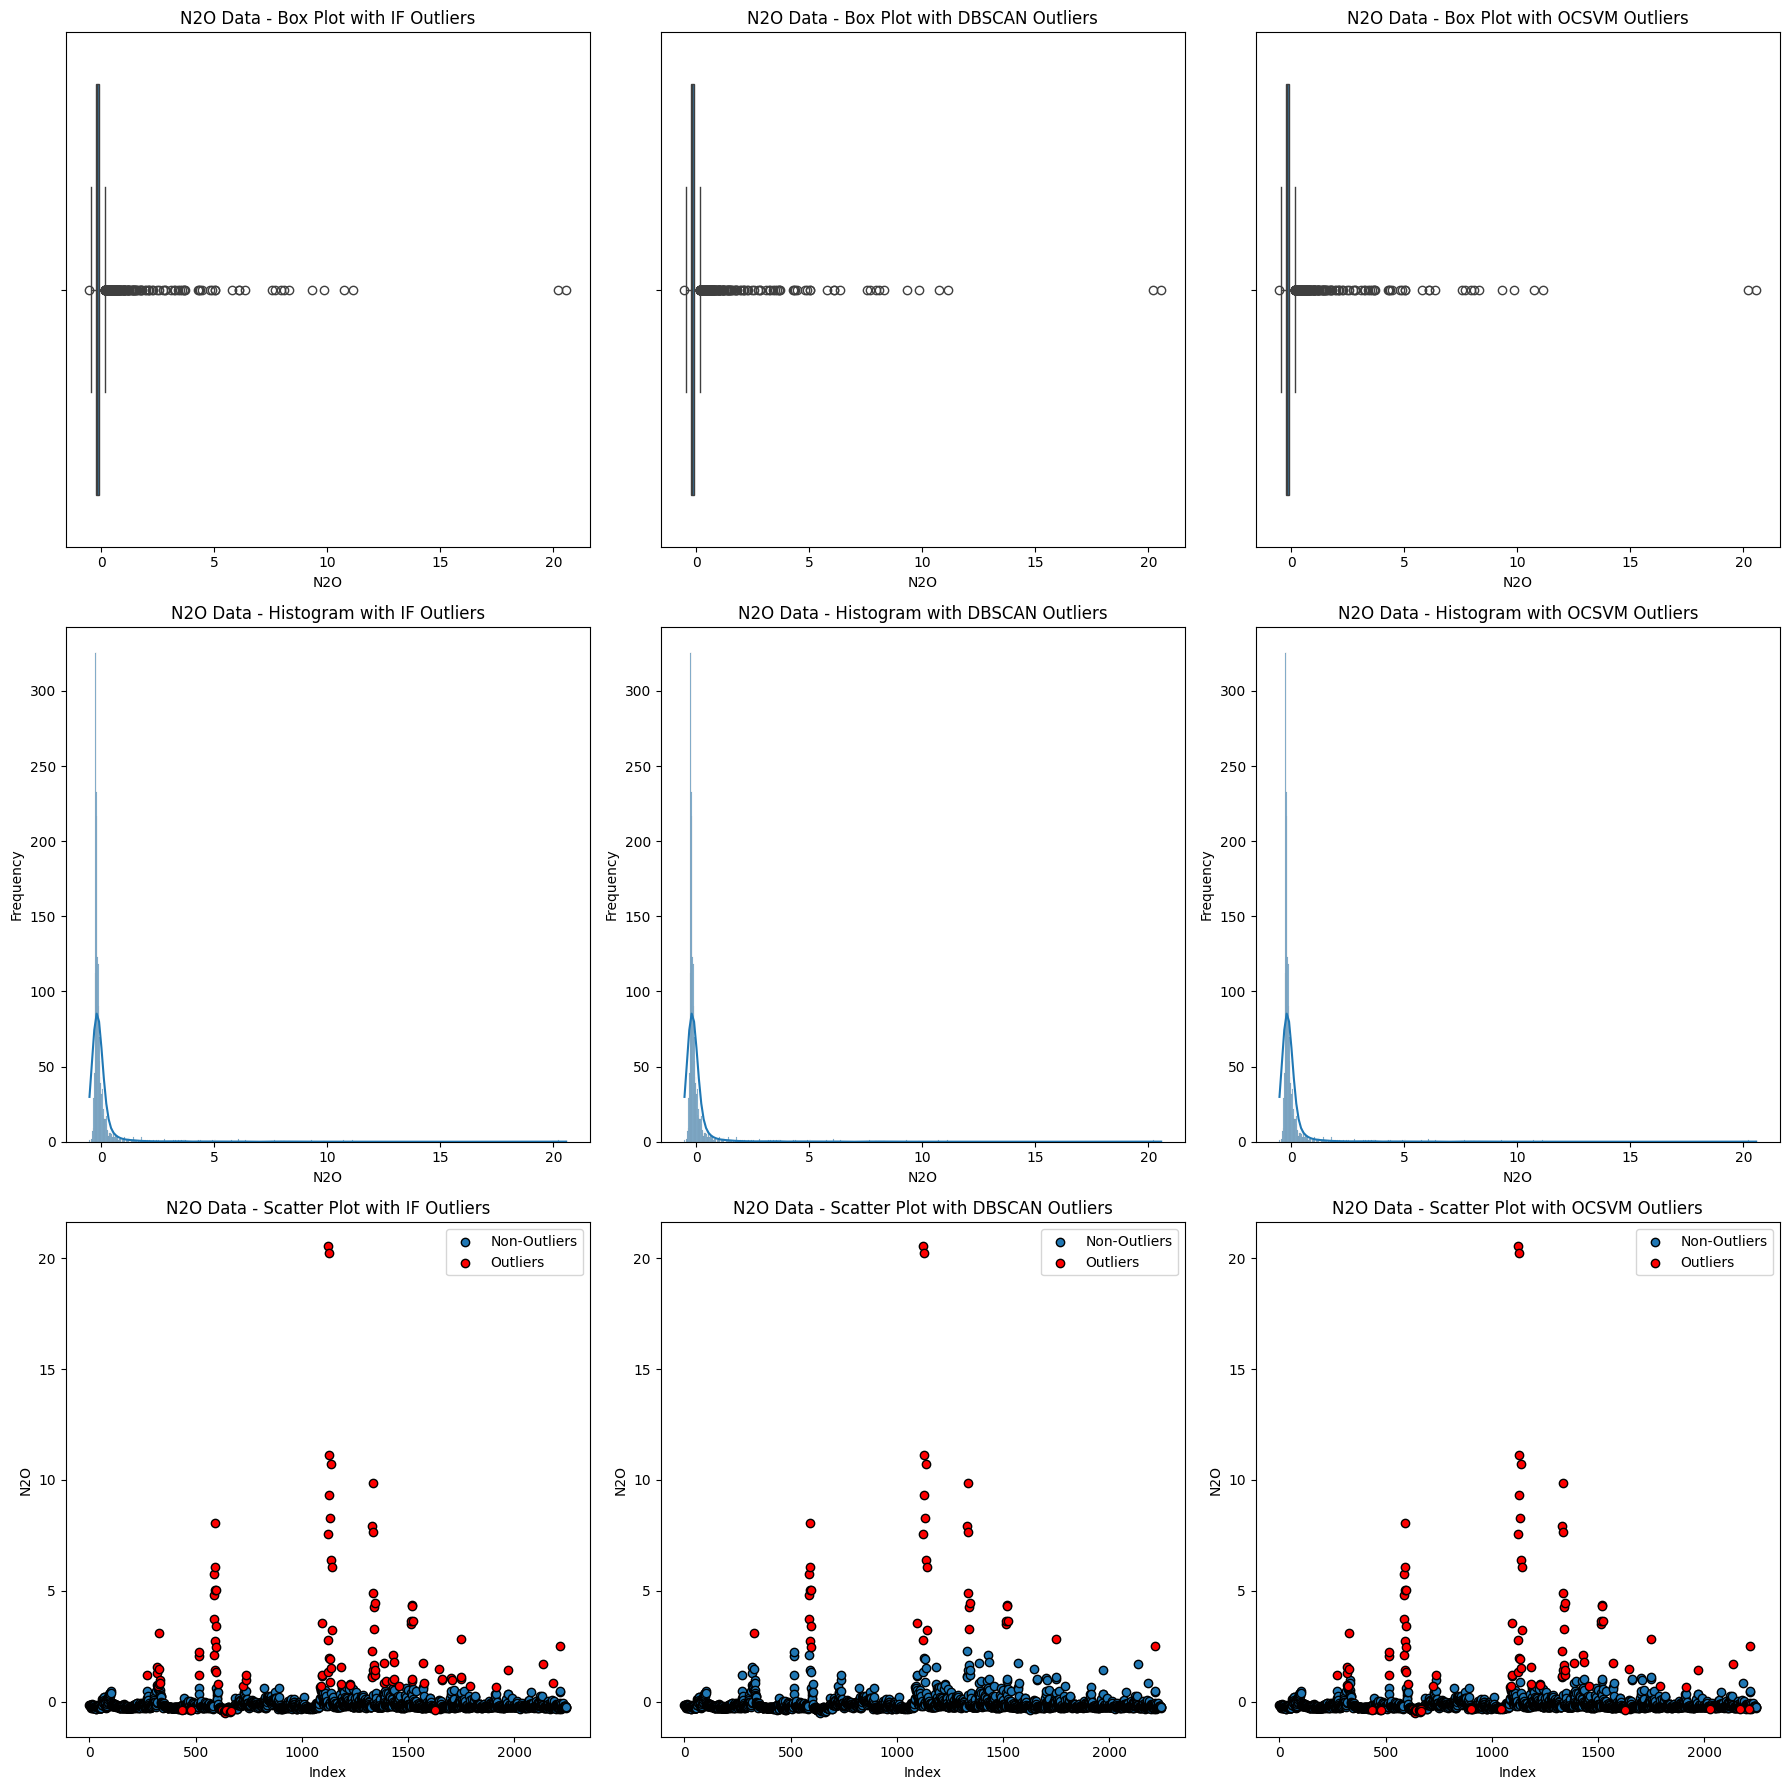

In [66]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Separate outliers and non-outliers for each method
outliers_if = data[data['IF_Outlier'] == -1]
non_outliers_if = data[data['IF_Outlier'] != -1]

outliers_dbscan = data[data['DBSCAN_Outlier'] == -1]
non_outliers_dbscan = data[data['DBSCAN_Outlier'] != -1]

outliers_ocsvm = data[data['OCSVM_Outlier'] == -1]
non_outliers_ocsvm = data[data['OCSVM_Outlier'] != -1]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [outliers_if.shape[0], outliers_dbscan.shape[0], outliers_ocsvm.shape[0]]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/05.N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(non_outliers_if.index, non_outliers_if['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 0].scatter(outliers_if.index, outliers_if['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')
axs[2, 0].legend()

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(non_outliers_dbscan.index, non_outliers_dbscan['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 1].scatter(outliers_dbscan.index, outliers_dbscan['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
axs[2, 1].legend()

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(non_outliers_ocsvm.index, non_outliers_ocsvm['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 2].scatter(outliers_ocsvm.index, outliers_ocsvm['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [77]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Label'] = ['outlier' if x == -1 else 'not outlier' for x in iso_pred]
data['DBSCAN_Label'] = ['outlier' if x == -1 else 'not outlier' for x in dbscan_pred]
data['OCSVM_Label'] = ['outlier' if x == -1 else 'not outlier' for x in ocsvm_pred]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        data[data['IF_Label'] == 'outlier'].shape[0],
        data[data['DBSCAN_Label'] == 'outlier'].shape[0],
        data[data['OCSVM_Label'] == 'outlier'].shape[0]
    ]
})

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Calculate the number of outliers for each method
outlier_counts = {
    'Isolation Forest': (data['IF_Outlier'] == -1).sum(),
    'DBSCAN': (data['DBSCAN_Outlier'] == -1).sum(),
    'One-Class SVM': (data['OCSVM_Outlier'] == -1).sum()
}
# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/06.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [78]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.076581,0.132085,-0.084319,1,1,0,1,not outlier,not outlier,not outlier
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,0.352933,0.126198,-0.357662,1,1,0,1,not outlier,not outlier,not outlier
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,0.613785,-0.135877,-0.631005,1,1,0,1,not outlier,not outlier,not outlier
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,0.445122,-0.199876,-0.069133,1,1,0,1,not outlier,not outlier,not outlier


In [25]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = ['outlier' if pred == -1 else 'not outlier' for pred in iso_pred]

# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/07.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())

      Date      Year Experiment   DataUse Replication     Month Vegetation  \
0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O    N_rate  ...  WFPS25cm       NH4       NO3      Clay  \
0  Annual -0.125408  0.481233  ...  0.797637 -0.031188 -0.083017 -0.904182   
1  Annual -0.185324  0.481233  ...  0.645128 -0.034134 -0.082259 -0.904182   
2  Annual -0.137842  0.481233  ...  1.160223 -0.047719 -0.071667 -0.904182   
3  Annual -0.144855  0.481233  ...  0.917547 -0.046323 -0.069647 -0.904182   
4  Annual -0.158726  0.481233  ...  1.090364 -0.095994 -0.031903 -0.904182   

       Sand       SOM  Outlier   IF_Outlier  DBSCAN_Outlier  O

In [26]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]
# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)
data['IF_Outlier'] = iso_pred

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)
data['DBSCAN_Outlier'] = dbscan_pred

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)
data['OCSVM_Outlier'] = ocsvm_pred

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum()
    ]
})

In [27]:
# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/008_N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,113,2133
1,DBSCAN,37,2209
2,One-Class SVM,112,2134


In [28]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/009_N2O_standard_scaler_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

             Method  Outlier Count  Inlier Count
0  Isolation Forest            113          2133
1            DBSCAN             37          2209
2     One-Class SVM            112          2134


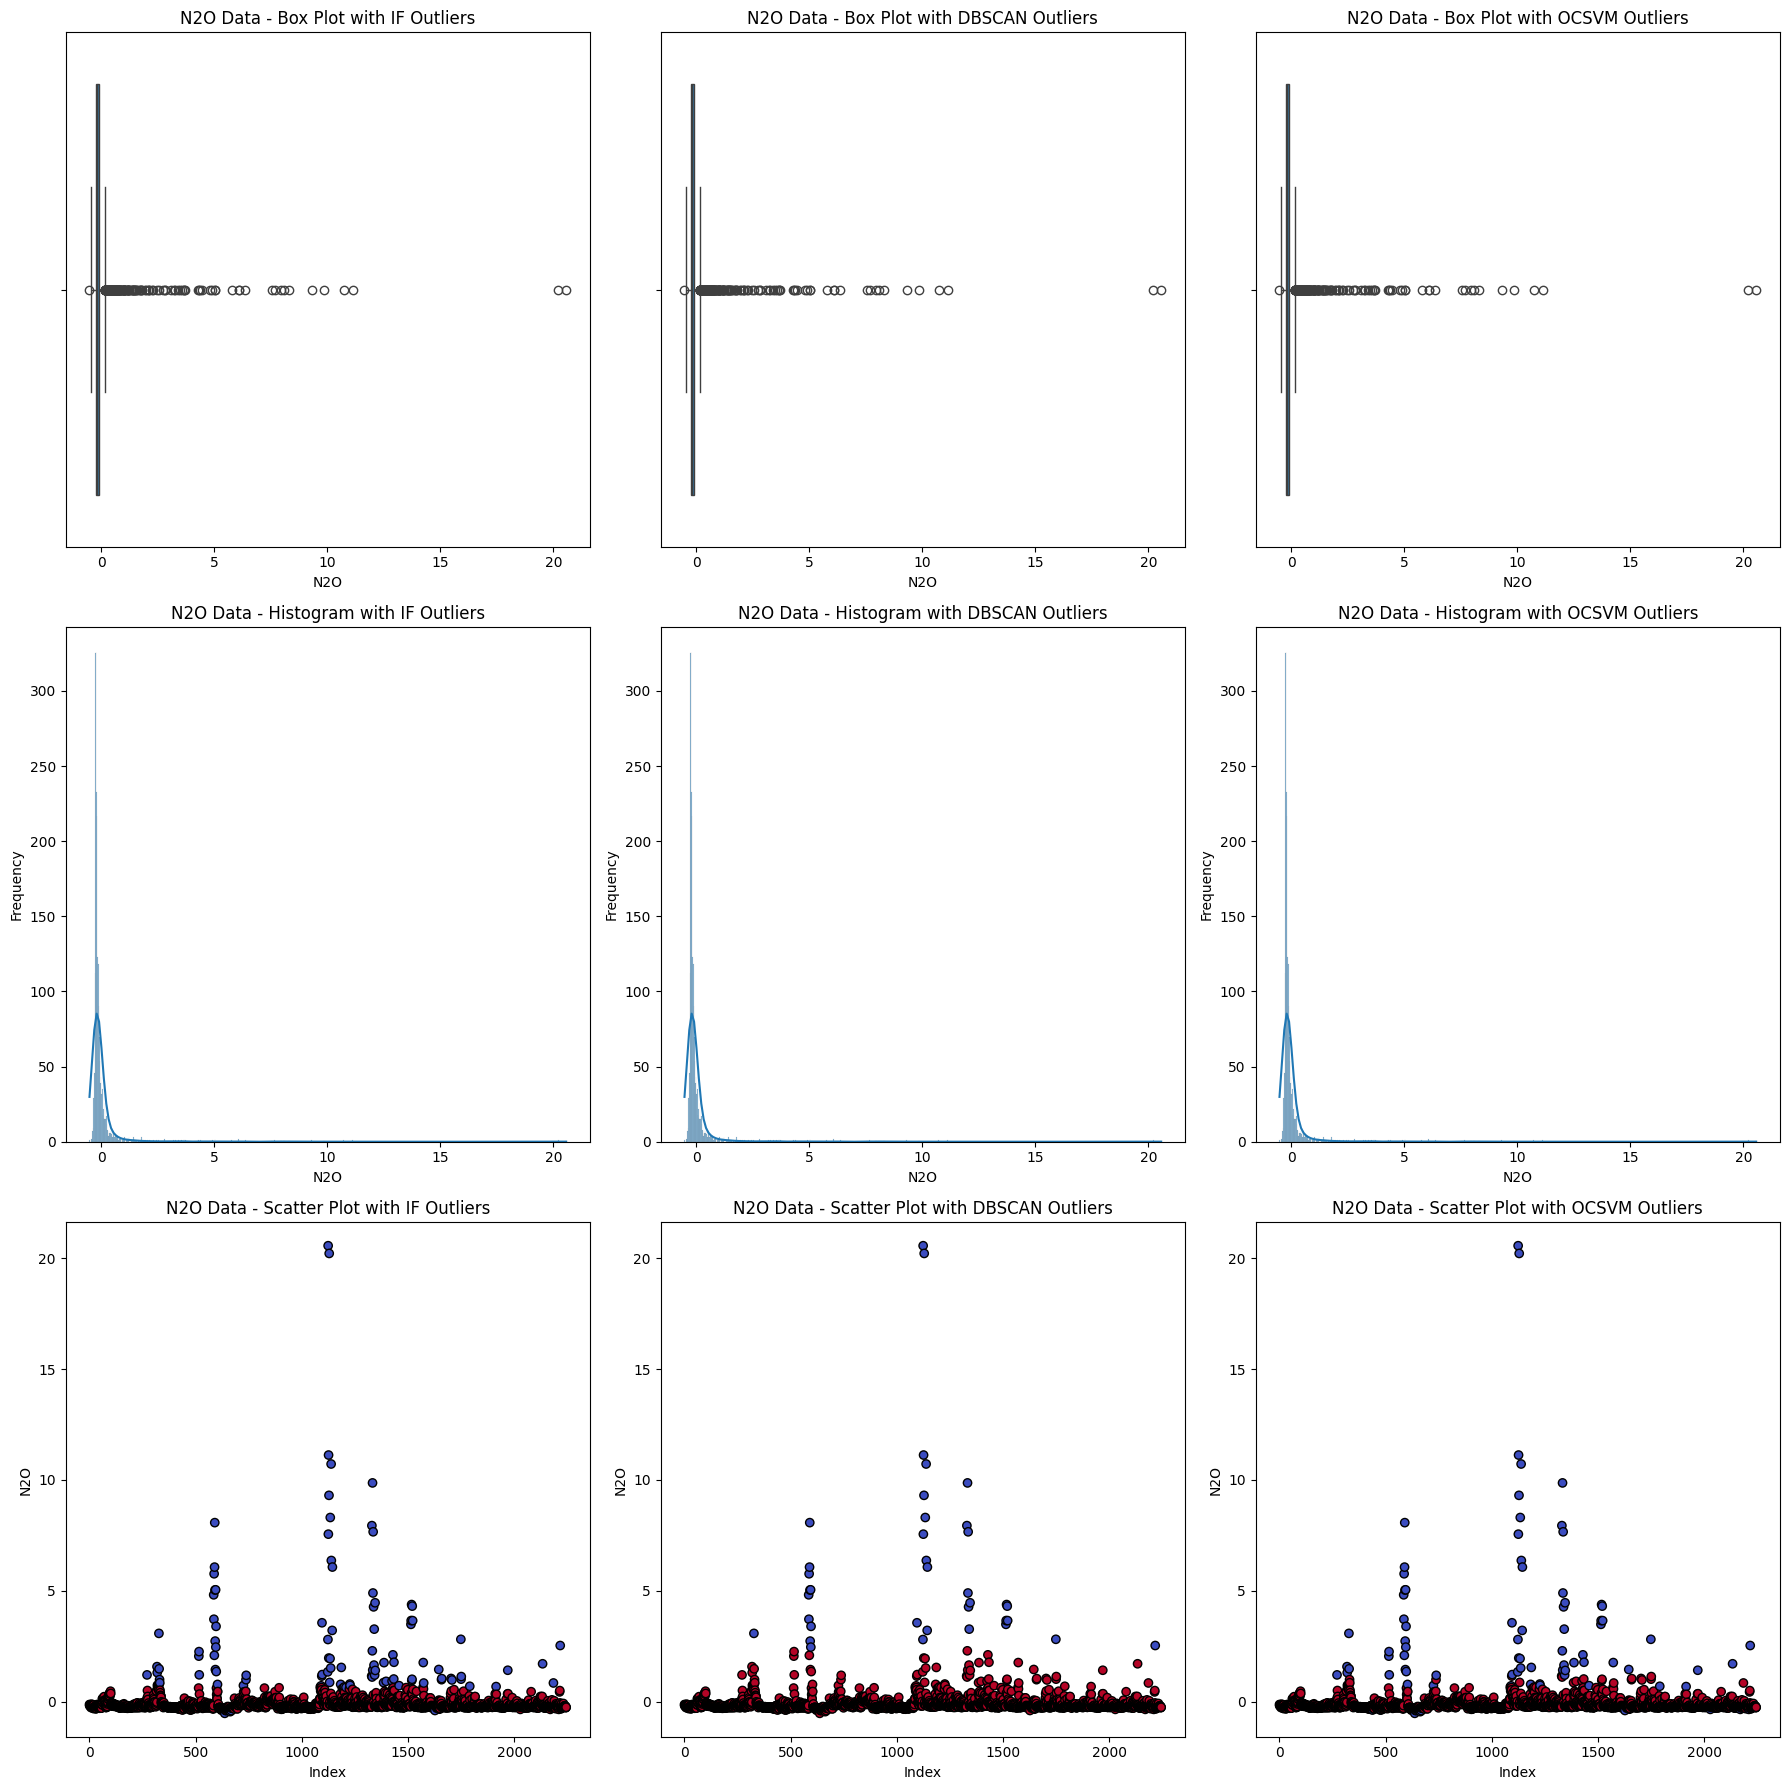

In [29]:
# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(data.index, data['N2O'], c=data['DBSCAN_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(data.index, data['N2O'], c=data['OCSVM_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

## Voting Method

In [30]:
# Combine results using voting method
data['Voting_Outlier'] = (data[['IF_Outlier', 'DBSCAN_Outlier', 'OCSVM_Outlier']] == -1).sum(axis=1) >= 2
data['Voting_Outlier'] = data['Voting_Outlier'].astype(int).replace({1: -1, 0: 1})


In [32]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/010_N2O_After_Voting_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

In [31]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NH4,NO3,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,Voting_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,1,0,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,1,0,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,1,0,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,1,0,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,1,0,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,1,0,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,1,0,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,1,0,1,1


In [33]:
# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Voting Method'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum(),
        (data['Voting_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum(),
        (data['Voting_Outlier'] == 1).sum()
    ]
})

In [34]:
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,113,2133
1,DBSCAN,37,2209
2,One-Class SVM,112,2134
3,Voting Method,88,2158


In [35]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/011_N2O_After_Voting_SummaryTable.csv'
summary_table.to_csv(updated_file_path, index=False)